# Title : My Capstone Project: Exploring Toronto and Searching for the Best Place to Establish an Indian Restaurant

# Index

•	Introduction<br>
•	Target Audience<br>
•	About the Data<br>
•	Pre-processing<br>
•	Data Analysis<br>
•	Results & Analysis<br>
•	Conclusion

# Introduction

Hello esteemed audience, as part of the capstone project I was assigned the task of formulating a hypothetical problem and coming up with a data science-oriented solution to unearth meaningful insights and conclusive results.

As the title suggests, the task here is to explore the beautiful city of Toronto, to traverse through its neighborhood areas and finally come up with a few suggestive neighborhoods that have business potential in terms of opening a new Indian restaurant.

When an individual dreams about venturing into the hospitality sector (i.e. Hotels & Restaurants). The prime aspect of such a business is to locate a place where the restaurant can be set-up. There are a lot of questions that arise when someone is hunting for a place to set-up a business. The main aspect during this hunt is to locate a place which has the least competition. This enables the new restaurant to thrive without hinderance. We will be locating such places in this project

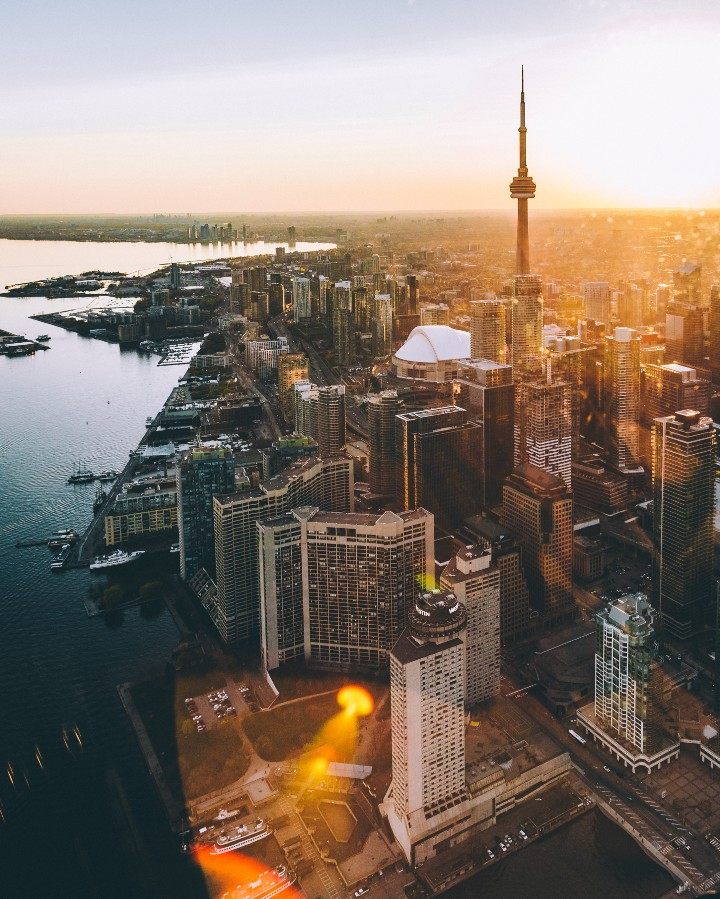<img src="files/image.png">

# Target Audience

While formulating the problem statement, I took into consideration the prospect of coming up with a predicament that could be faced by individuals in the real world. Hence I came up with a problem statement that aims at finding the best possible location for a proposed Indian restaurant in the city of Toronto. 

This will serve two purposes for two different audience sets. Firstly, this will help individuals who are aiming to start a new business in the hospitality sector (i.e. Restaurants), find a place that has the least concentration of Indian restaurants. Secondly, this could help tourists, choose places (neighborhoods) based on their personal preferences. For example, a neighborhood with a good  bunch of restaurants or a neighborhood which is home to a considerable number of parks that tourists can possibly be interested in. 

# About Data Set

The data set required for the following project was acquired from three different data sources. The three data sources are listed below,

• A Wikipedia Page to fetch boroughs and neighborhoods of Toronto city.

• A .csv file to fetch latitudes and longitudes corresponding to each postal code.

• The foursquare api to fetch different public venues in the vicinity of the neighborhood.

The Wikipedia page contains a table of postal codes followed in Toronto, along with the boroughs and neighborhoods in Toronto city.
The .csv file provides us with the latitude and longitude co-ordinates of each postal code followed in the region of Toronto. This data is beneficial since these co-ordinates are then used in tandem with the four square api to give out a list of popular venues in each neighborhood.

The data is comprehensive, and yields valuable insights related to Toronto city that eventually helped us in unearthing conclusive results and observations. The data source, as it is perceived at the start of the project is unclean and required intensive pre-processing in order to convert it to a working set, capable of handling machine learning algorithms and visualization operations that were implemented on it.

# Pre-Processing

We will first start with acquiring the data from the above mentione data sources.

## Wikipedia Page

In [2]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
table = pd.read_html(url)

In [3]:
df=table[0]

In [4]:
df.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [5]:
df.tail()

,Postcode,Borough,Neighborhood
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor
286,M9Z,Not assigned,Not assigned


### Removing rows with values not assigned

In [6]:
df = df[df.Borough != 'Not assigned']

In [7]:
df = df.sort_values(by = ['Postcode','Borough'])

In [8]:
df.reset_index(inplace=True)

In [9]:
df.drop('index', axis = 1, inplace = True)

In [10]:
df.head()

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,Rouge
1,M1B,Scarborough,Malvern
2,M1C,Scarborough,Highland Creek
3,M1C,Scarborough,Rouge Hill
4,M1C,Scarborough,Port Union


## Importing Data from .csv for latitude and longitude

In [11]:
df_p = pd.read_csv('https://cocl.us/Geospatial_data')

In [12]:
df_p.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Renaming column in imported .csv file so that the two data frames can be merged

In [13]:
df_p.rename(columns = {'Postal Code':'Postcode'}, inplace =True)

In [14]:
df_p.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [15]:
df=pd.merge(df, df_p, on='Postcode')

In [16]:
df.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Rouge,43.806686,-79.194353
1,M1B,Scarborough,Malvern,43.806686,-79.194353
2,M1C,Scarborough,Highland Creek,43.784535,-79.160497
3,M1C,Scarborough,Rouge Hill,43.784535,-79.160497
4,M1C,Scarborough,Port Union,43.784535,-79.160497


In [17]:
df.drop(['Postcode'],inplace=True,axis=1)

In [83]:
df.head(20)

,Borough,Neighborhood,Latitude,Longitude
0,Scarborough,Rouge,43.806686,-79.194353
1,Scarborough,Malvern,43.806686,-79.194353
2,Scarborough,Highland Creek,43.784535,-79.160497
3,Scarborough,Rouge Hill,43.784535,-79.160497
4,Scarborough,Port Union,43.784535,-79.160497
5,Scarborough,Guildwood,43.763573,-79.188711
6,Scarborough,Morningside,43.763573,-79.188711
7,Scarborough,West Hill,43.763573,-79.188711
8,Scarborough,Woburn,43.770992,-79.216917
9,Scarborough,Cedarbrae,43.773136,-79.239476


### Now that we are done with the pre-processing of our data, we will start with analysis phase

# Data Analysis 

In [358]:
dff=df['Borough'].unique()
dff

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       "Queen's Park", 'Mississauga', 'Etobicoke'], dtype=object)

In [359]:
df_final1=df

In [360]:
df_final2=df

In [361]:
df_final1

,Borough,Neighborhood,Latitude,Longitude
0,Scarborough,Rouge,43.806686,-79.194353
1,Scarborough,Malvern,43.806686,-79.194353
2,Scarborough,Highland Creek,43.784535,-79.160497
3,Scarborough,Rouge Hill,43.784535,-79.160497
4,Scarborough,Port Union,43.784535,-79.160497
5,Scarborough,Guildwood,43.763573,-79.188711
6,Scarborough,Morningside,43.763573,-79.188711
7,Scarborough,West Hill,43.763573,-79.188711
8,Scarborough,Woburn,43.770992,-79.216917
9,Scarborough,Cedarbrae,43.773136,-79.239476


In [362]:
df_final2

,Borough,Neighborhood,Latitude,Longitude
0,Scarborough,Rouge,43.806686,-79.194353
1,Scarborough,Malvern,43.806686,-79.194353
2,Scarborough,Highland Creek,43.784535,-79.160497
3,Scarborough,Rouge Hill,43.784535,-79.160497
4,Scarborough,Port Union,43.784535,-79.160497
5,Scarborough,Guildwood,43.763573,-79.188711
6,Scarborough,Morningside,43.763573,-79.188711
7,Scarborough,West Hill,43.763573,-79.188711
8,Scarborough,Woburn,43.770992,-79.216917
9,Scarborough,Cedarbrae,43.773136,-79.239476


In [22]:
#conda update -n base -c defaults conda

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import pandas as pd # 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 

print('Libraries imported.')

Libraries imported.


## Using Foursquare api Now

In [24]:
CLIENT_ID = 'IOXUDFQZQQ4QCB45PYU3U0QDPKABOHB2QQ4AHGBNQL0DJ041' 
CLIENT_SECRET = 'QHGENDMQVHK2BNZBXSLCNHHWOKERW151FGEJ30421HUJCDJM'
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IOXUDFQZQQ4QCB45PYU3U0QDPKABOHB2QQ4AHGBNQL0DJ041
CLIENT_SECRET:QHGENDMQVHK2BNZBXSLCNHHWOKERW151FGEJ30421HUJCDJM


### We will now explore places in Scarborough

In [25]:
scarborough_data = df_final1[df_final1['Borough'] == 'Scarborough'].reset_index(drop=True)
scarborough_data

,Borough,Neighborhood,Latitude,Longitude
0,Scarborough,Rouge,43.806686,-79.194353
1,Scarborough,Malvern,43.806686,-79.194353
2,Scarborough,Highland Creek,43.784535,-79.160497
3,Scarborough,Rouge Hill,43.784535,-79.160497
4,Scarborough,Port Union,43.784535,-79.160497
5,Scarborough,Guildwood,43.763573,-79.188711
6,Scarborough,Morningside,43.763573,-79.188711
7,Scarborough,West Hill,43.763573,-79.188711
8,Scarborough,Woburn,43.770992,-79.216917
9,Scarborough,Cedarbrae,43.773136,-79.239476


We will now get into more detail and extract venues in terms of the neighborhood that they belong to 

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
scarborough_venues = getNearbyVenues(names=scarborough_data['Neighborhood'],
                                   latitudes=scarborough_data['Latitude'],
                                   longitudes=scarborough_data['Longitude']
                                  )

Rouge
Malvern
Highland Creek
Rouge Hill
Port Union
Guildwood
Morningside
West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park
Ionview
Kennedy Park
Clairlea
Golden Mile
Oakridge
Cliffcrest
Cliffside
Scarborough Village West
Birch Cliff
Cliffside West
Dorset Park
Scarborough Town Centre
Wexford Heights
Maryvale
Wexford
Agincourt
Clarks Corners
Sullivan
Tam O'Shanter
Agincourt North
L'Amoreaux East
Milliken
Steeles East
L'Amoreaux West
Upper Rouge


In [28]:
print(scarborough_venues.shape)
scarborough_venues

(207, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rouge,43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,Malvern,43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
2,Highland Creek,43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,Highland Creek,43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum
4,Rouge Hill,43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
5,Rouge Hill,43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum
6,Port Union,43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
7,Port Union,43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum
8,Guildwood,43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
9,Guildwood,43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [29]:
scarborough_venues1=scarborough_venues.groupby('Neighborhood').count()

In [30]:
scarborough_venues['Venue Category'].unique()

array(['Fast Food Restaurant', 'Bar', 'History Museum', 'Pizza Place',
       'Electronics Store', 'Mexican Restaurant', 'Rental Car Location',
       'Medical Center', 'Intersection', 'Breakfast Spot', 'Coffee Shop',
       'Korean Restaurant', 'Hakka Restaurant', 'Caribbean Restaurant',
       'Thai Restaurant', 'Athletics & Sports', 'Bank', 'Gas Station',
       'Bakery', 'Fried Chicken Joint', 'Playground', 'Cosmetics Shop',
       'Department Store', 'Discount Store', 'Hobby Shop', 'Bus Station',
       'Bus Line', 'Metro Station', 'Park', 'Soccer Field', 'Motel',
       'Movie Theater', 'American Restaurant', 'Café',
       'General Entertainment', 'Skating Rink', 'College Stadium',
       'Indian Restaurant', 'Chinese Restaurant', 'Vietnamese Restaurant',
       'Pet Store', 'Light Rail Station', 'Brewery', 'Gaming Cafe',
       'Sandwich Place', 'Shopping Mall', 'Auto Garage', 'Lounge',
       'Latin American Restaurant', 'Clothing Store',
       'Italian Restaurant', 'Noodle H

Importing the Venue Category into a new Data Frame, so as to help in plotting of histogram

In [31]:
scarborough_venue_count=scarborough_venues['Venue Category'].value_counts().to_frame()

In [32]:
scarborough_venue_count

,Venue Category
Fast Food Restaurant,10
Pizza Place,10
Coffee Shop,9
Bakery,9
Chinese Restaurant,8
Breakfast Spot,7
Park,7
Pharmacy,7
Bus Station,6
Intersection,6


In [33]:
scarborough_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Fast Food Restaurant,10
Pizza Place,10
Coffee Shop,9
Bakery,9
Chinese Restaurant,8
Breakfast Spot,7
Park,7
Pharmacy,7
Bus Station,6
Intersection,6


Now plotting it on a barplot to show the count of each venue in Scarborough

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

Text(0, 0.5, 'Count')

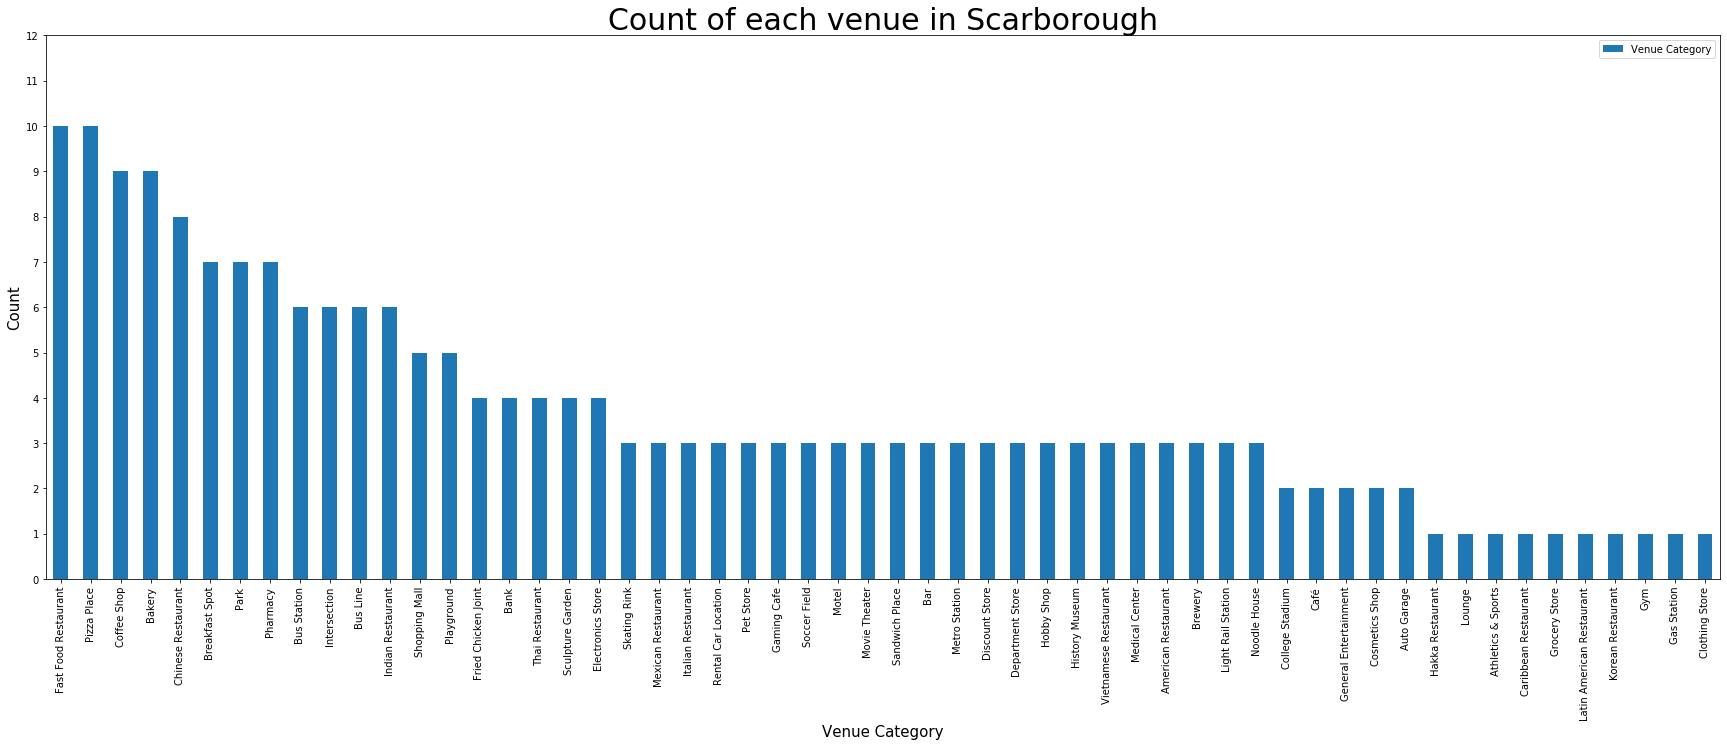

In [35]:
import math
yint = range(0,13)
scarborough_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in Scarborough',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)


### We will now explore places in North York

In [36]:
northyork_data = df_final1[df_final1['Borough'] == 'North York'].reset_index(drop=True)
northyork_data

,Borough,Neighborhood,Latitude,Longitude
0,North York,Hillcrest Village,43.803762,-79.363452
1,North York,Fairview,43.778517,-79.346556
2,North York,Henry Farm,43.778517,-79.346556
3,North York,Oriole,43.778517,-79.346556
4,North York,Bayview Village,43.786947,-79.385975
5,North York,Silver Hills,43.757490,-79.374714
6,North York,York Mills,43.757490,-79.374714
7,North York,Newtonbrook,43.789053,-79.408493
8,North York,Willowdale,43.789053,-79.408493
9,North York,Willowdale South,43.770120,-79.408493


We will now explore the neighborhoods of North York for different Venues 

In [38]:
northyork_venues = getNearbyVenues(names=northyork_data['Neighborhood'],
                                   latitudes=northyork_data['Latitude'],
                                   longitudes=northyork_data['Longitude']
                                  )

Hillcrest Village
Fairview
Henry Farm
Oriole
Bayview Village
Silver Hills
York Mills
Newtonbrook
Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park
Don Mills South
Bathurst Manor
Downsview North
Wilson Heights
Northwood Park
York University
CFB Toronto
Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Bedford Park
Lawrence Manor East
Lawrence Heights
Lawrence Manor
Glencairn
Downsview
North Park
Upwood Park
Humber Summit
Emery
Humberlea


In [39]:
northyork_venues.shape

(377, 7)

In [40]:
northyork_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hillcrest Village,43.803762,-79.363452,Eagle's Nest Golf Club,43.805455,-79.364186,Golf Course
1,Hillcrest Village,43.803762,-79.363452,AY Jackson Pool,43.804515,-79.366138,Pool
2,Hillcrest Village,43.803762,-79.363452,Villa Madina,43.801685,-79.363938,Mediterranean Restaurant
3,Hillcrest Village,43.803762,-79.363452,Duncan Creek Park,43.805539,-79.360695,Dog Run
4,Hillcrest Village,43.803762,-79.363452,A.Y. Jackson Secondary School Track,43.805068,-79.366677,Athletics & Sports


Determining the different venues in North York

In [41]:
northyork_venues['Venue Category'].unique()

array(['Golf Course', 'Pool', 'Mediterranean Restaurant', 'Dog Run',
       'Athletics & Sports', 'Toy / Game Store', 'Movie Theater',
       'Burger Joint', 'Shopping Mall', 'Bakery', 'Candy Store',
       'Tea Room', 'Electronics Store', 'American Restaurant',
       'Fast Food Restaurant', 'Pharmacy', 'Clothing Store',
       'Department Store', 'Coffee Shop', 'Salon / Barbershop',
       'Smoothie Shop', 'Theater', 'Food Court', 'Japanese Restaurant',
       'Liquor Store', 'Bank', 'Juice Bar', 'Restaurant',
       'Cosmetics Shop', 'Chinese Restaurant', 'Café', 'Cafeteria',
       'Grocery Store', 'Ramen Restaurant', 'Steakhouse',
       'Indonesian Restaurant', 'Arts & Crafts Store', 'Plaza',
       'Pet Store', 'Ice Cream Shop', 'Sandwich Place', 'Lounge',
       'Vietnamese Restaurant', 'Sushi Restaurant', 'Discount Store',
       'Middle Eastern Restaurant', 'Pizza Place', 'Bubble Tea Shop',
       'Convenience Store', 'Park', 'Bar', 'Food & Drink Shop',
       'BBQ Joint', 'G

In [42]:
northyork_venue_count=northyork_venues['Venue Category'].value_counts().to_frame()

In [43]:
northyork_venue_count

,Venue Category
Coffee Shop,34
Clothing Store,20
Fast Food Restaurant,13
Restaurant,11
Park,10
Pizza Place,10
Japanese Restaurant,9
Pharmacy,9
Sandwich Place,9
Bank,9


In [44]:
northyork_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Coffee Shop,34
Clothing Store,20
Fast Food Restaurant,13
Restaurant,11
Park,10
Pizza Place,10
Japanese Restaurant,9
Pharmacy,9
Sandwich Place,9
Bank,9


Text(0, 0.5, 'Count')

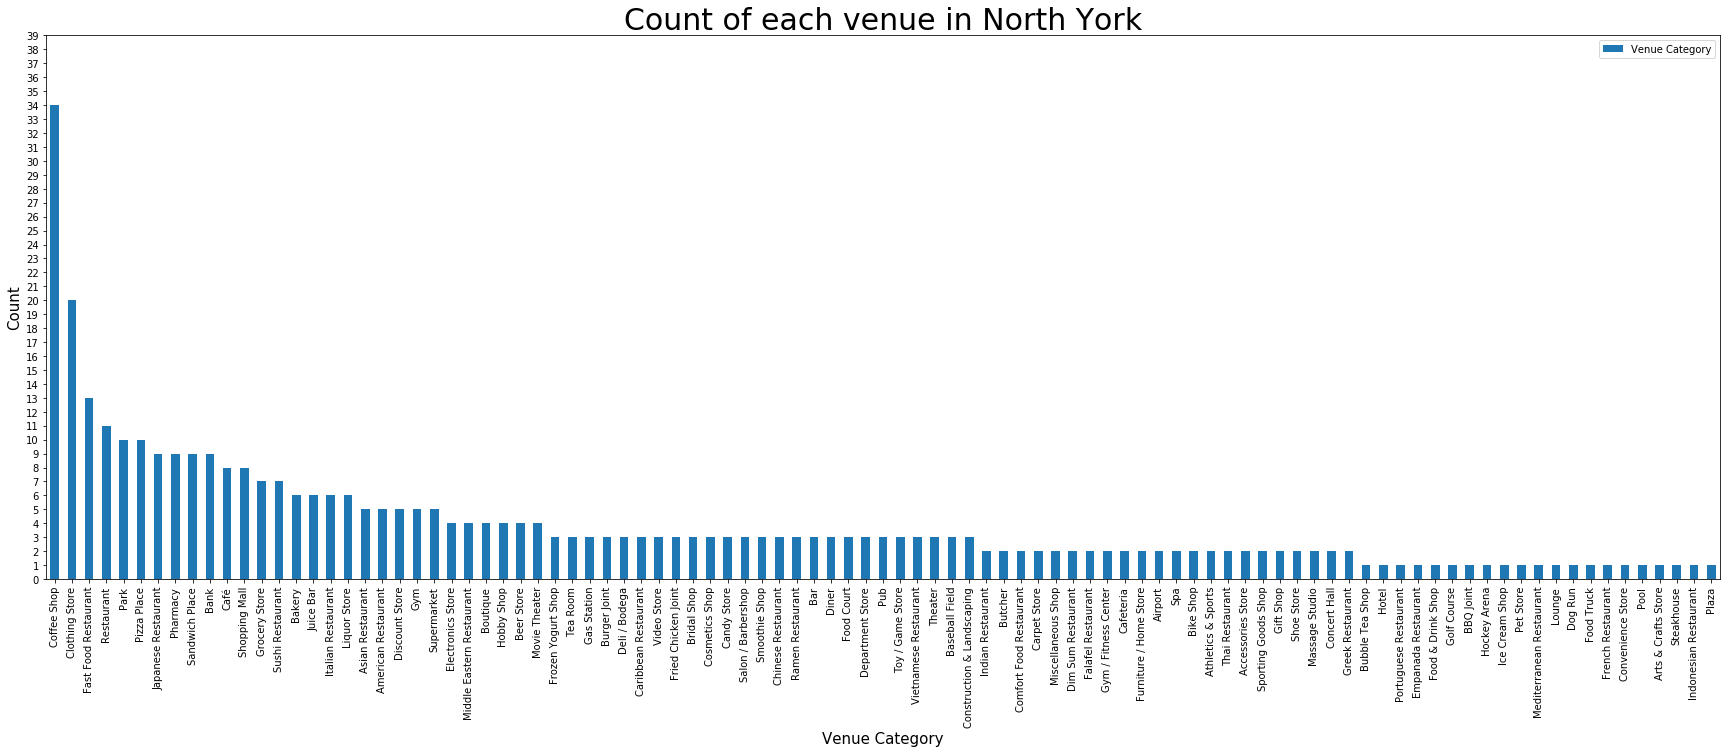

In [45]:
yint = range(0,40)
northyork_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in North York',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

## Moving on to East York now

In [46]:
eastyork_data = df_final1[df_final1['Borough'] == 'East York'].reset_index(drop=True)
eastyork_data

,Borough,Neighborhood,Latitude,Longitude
0,East York,Woodbine Gardens,43.706397,-79.309937
1,East York,Parkview Hill,43.706397,-79.309937
2,East York,Woodbine Heights,43.695344,-79.318389
3,East York,Leaside,43.709060,-79.363452
4,East York,Thorncliffe Park,43.705369,-79.349372
5,East York,East Toronto,43.685347,-79.338106


We will now explore the neighborhoods of East York for different Venues

In [48]:
eastyork_venues = getNearbyVenues(names=eastyork_data['Neighborhood'],
                                   latitudes=eastyork_data['Latitude'],
                                   longitudes=eastyork_data['Longitude']
                                  )

Woodbine Gardens
Parkview Hill
Woodbine Heights
Leaside
Thorncliffe Park
East Toronto


In [49]:
eastyork_venues.shape

(85, 7)

In [50]:
eastyork_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Woodbine Gardens,43.706397,-79.309937,Jawny Bakers,43.705783,-79.312913,Gastropub
1,Woodbine Gardens,43.706397,-79.309937,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
2,Woodbine Gardens,43.706397,-79.309937,Shoppers Drug Mart,43.705933,-79.312825,Pharmacy
3,Woodbine Gardens,43.706397,-79.309937,TD Canada Trust,43.705740,-79.312270,Bank
4,Woodbine Gardens,43.706397,-79.309937,Pizza Pizza,43.705159,-79.313130,Pizza Place


In [51]:
eastyork_venues['Venue Category'].unique()

array(['Gastropub', 'Gym / Fitness Center', 'Pharmacy', 'Bank',
       'Pizza Place', 'Fast Food Restaurant', 'Pet Store', 'Intersection',
       'Athletics & Sports', 'Skating Rink', 'Curling Ice', 'Beer Store',
       'Bus Stop', 'Cosmetics Shop', 'Park', 'Asian Restaurant',
       'Video Store', 'Sports Bar', 'Liquor Store', 'Fish & Chips Shop',
       'Sporting Goods Shop', 'Gym', 'Restaurant', 'Bike Shop',
       'Supermarket', 'Grocery Store', 'Coffee Shop', 'Smoothie Shop',
       'Burger Joint', 'Sushi Restaurant', 'Clothing Store',
       'Sandwich Place', 'Shopping Mall', 'Dessert Shop',
       'Breakfast Spot', 'Brewery', 'Furniture / Home Store',
       'Mexican Restaurant', 'Electronics Store', 'Warehouse Store',
       'Indian Restaurant', 'Yoga Studio', 'Gas Station',
       'Housing Development', 'Discount Store', 'Convenience Store',
       'Metro Station'], dtype=object)

In [52]:
eastyork_venue_count=eastyork_venues['Venue Category'].value_counts().to_frame()

eastyork_venue_count

,Venue Category
Pizza Place,6
Coffee Shop,5
Fast Food Restaurant,4
Pharmacy,4
Burger Joint,4
Bank,4
Park,3
Pet Store,3
Sporting Goods Shop,3
Gym / Fitness Center,3


In [53]:
eastyork_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Pizza Place,6
Coffee Shop,5
Fast Food Restaurant,4
Pharmacy,4
Burger Joint,4
Bank,4
Park,3
Pet Store,3
Sporting Goods Shop,3
Gym / Fitness Center,3


Text(0, 0.5, 'Count')

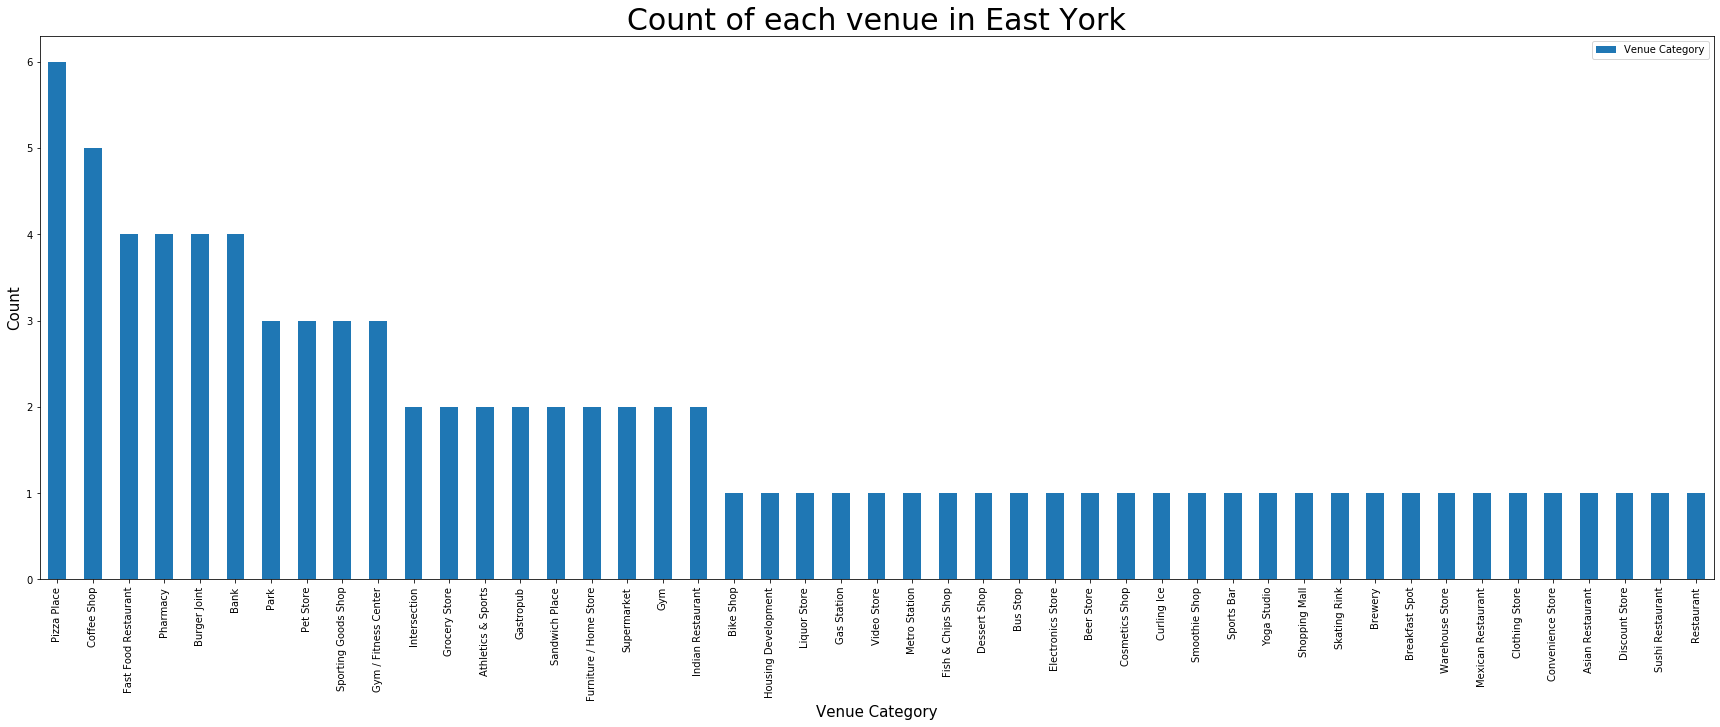

In [54]:
yint = range(0,7)
eastyork_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in East York',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)


## And the last borough with York in it....York

In [55]:
york_data = df_final1[df_final1['Borough'] == 'York'].reset_index(drop=True)
york_data

,Borough,Neighborhood,Latitude,Longitude
0,York,Humewood-Cedarvale,43.693781,-79.428191
1,York,Caledonia-Fairbanks,43.689026,-79.453512
2,York,Del Ray,43.691116,-79.476013
3,York,Keelesdale,43.691116,-79.476013
4,York,Mount Dennis,43.691116,-79.476013
5,York,Silverthorn,43.691116,-79.476013
6,York,The Junction North,43.673185,-79.487262
7,York,Runnymede,43.673185,-79.487262
8,York,Weston,43.706876,-79.518188


In [59]:
york_venues = getNearbyVenues(names=york_data['Neighborhood'],
                                   latitudes=york_data['Latitude'],
                                   longitudes=york_data['Longitude']
                                  )

Humewood-Cedarvale
Caledonia-Fairbanks
Del Ray
Keelesdale
Mount Dennis
Silverthorn
The Junction North
Runnymede
Weston


In [60]:
york_venues.shape

(35, 7)

In [61]:
york_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Humewood-Cedarvale,43.693781,-79.428191,Cedarvale Park,43.692535,-79.428705,Field
1,Humewood-Cedarvale,43.693781,-79.428191,Phil White Arena,43.691303,-79.431761,Hockey Arena
2,Humewood-Cedarvale,43.693781,-79.428191,Cedarvale Ravine,43.690188,-79.426106,Trail
3,Humewood-Cedarvale,43.693781,-79.428191,Prince's Parkette,43.697385,-79.424704,Park
4,Caledonia-Fairbanks,43.689026,-79.453512,KFC,43.690647,-79.456326,Fast Food Restaurant


In [62]:
york_venues['Venue Category'].unique()

array(['Field', 'Hockey Arena', 'Trail', 'Park', 'Fast Food Restaurant',
       "Women's Store", 'Market', 'Sandwich Place', 'Discount Store',
       'Museum', 'Caribbean Restaurant', 'Convenience Store', 'Brewery',
       'Grocery Store'], dtype=object)

In [63]:
york_venue_count=eastyork_venues['Venue Category'].value_counts().to_frame()
york_venue_count

,Venue Category
Pizza Place,6
Coffee Shop,5
Fast Food Restaurant,4
Pharmacy,4
Burger Joint,4
Bank,4
Park,3
Pet Store,3
Sporting Goods Shop,3
Gym / Fitness Center,3


In [64]:
york_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Pizza Place,6
Coffee Shop,5
Fast Food Restaurant,4
Pharmacy,4
Burger Joint,4
Bank,4
Park,3
Pet Store,3
Sporting Goods Shop,3
Gym / Fitness Center,3


Text(0, 0.5, 'Count')

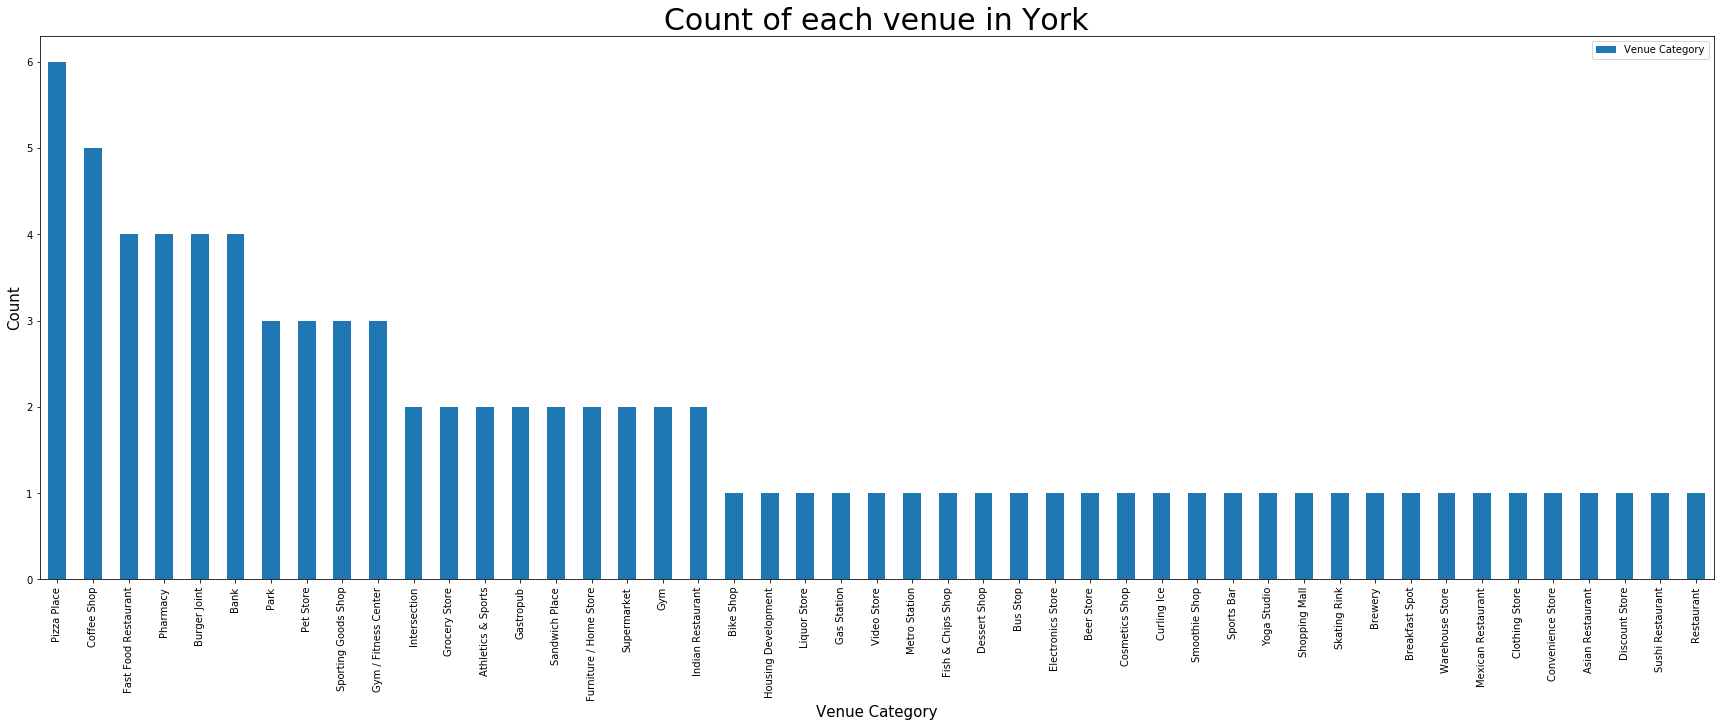

In [65]:
yint = range(0,7)
york_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in York',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

## We will now explore the borough with Toronto associated with it

## Starting with East Toronto

In [66]:
etoro_data = df_final1[df_final1['Borough'] == 'East Toronto'].reset_index(drop=True)
etoro_data

,Borough,Neighborhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,The Danforth West,43.679557,-79.352188
2,East Toronto,Riverdale,43.679557,-79.352188
3,East Toronto,The Beaches West,43.668999,-79.315572
4,East Toronto,India Bazaar,43.668999,-79.315572
5,East Toronto,Studio District,43.659526,-79.340923
6,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558


In [68]:
etoro_venues = getNearbyVenues(names=etoro_data['Neighborhood'],
                                   latitudes=etoro_data['Latitude'],
                                   longitudes=etoro_data['Longitude']
                                  )

The Beaches
The Danforth West
Riverdale
The Beaches West
India Bazaar
Studio District
Business Reply Mail Processing Centre 969 Eastern


In [69]:
etoro_venues.shape

(149, 7)

In [70]:
etoro_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,The Danforth West,43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [71]:
etoro_venues['Venue Category'].unique()

array(['Trail', 'Health Food Store', 'Pub', 'Neighborhood',
       'Greek Restaurant', 'Ice Cream Shop', 'Cosmetics Shop',
       'Italian Restaurant', 'Yoga Studio', 'Brewery',
       'Fruit & Vegetable Store', 'Pizza Place', 'Juice Bar',
       'Restaurant', 'Bookstore', 'Bubble Tea Shop',
       'Furniture / Home Store', 'Spa', 'Diner', 'Dessert Shop',
       'Grocery Store', 'Coffee Shop', 'Gym', 'Burger Joint',
       'Fish & Chips Shop', 'Sushi Restaurant', 'Park', 'Liquor Store',
       'Pet Store', 'Burrito Place', 'Steakhouse', 'Movie Theater',
       'Fast Food Restaurant', 'Sandwich Place', 'Light Rail Station',
       'Food & Drink Shop', 'Fish Market', 'Bakery', 'Cheese Shop',
       'Café', 'Seafood Restaurant', 'Gay Bar', 'Thai Restaurant',
       'Comfort Food Restaurant', 'Middle Eastern Restaurant',
       'American Restaurant', 'Stationery Store', 'Wine Bar',
       'Coworking Space', 'Latin American Restaurant', 'Farmers Market',
       'Comic Shop', 'Skate Park', '

In [72]:
etoro_venue_count=etoro_venues['Venue Category'].value_counts().to_frame()
etoro_venue_count

,Venue Category
Greek Restaurant,16
Italian Restaurant,8
Ice Cream Shop,7
Coffee Shop,7
Pub,5
Sandwich Place,5
Brewery,5
Light Rail Station,4
Park,4
Café,4


In [73]:
etoro_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Greek Restaurant,16
Italian Restaurant,8
Ice Cream Shop,7
Coffee Shop,7
Pub,5
Sandwich Place,5
Brewery,5
Light Rail Station,4
Park,4
Café,4


Text(0, 0.5, 'Count')

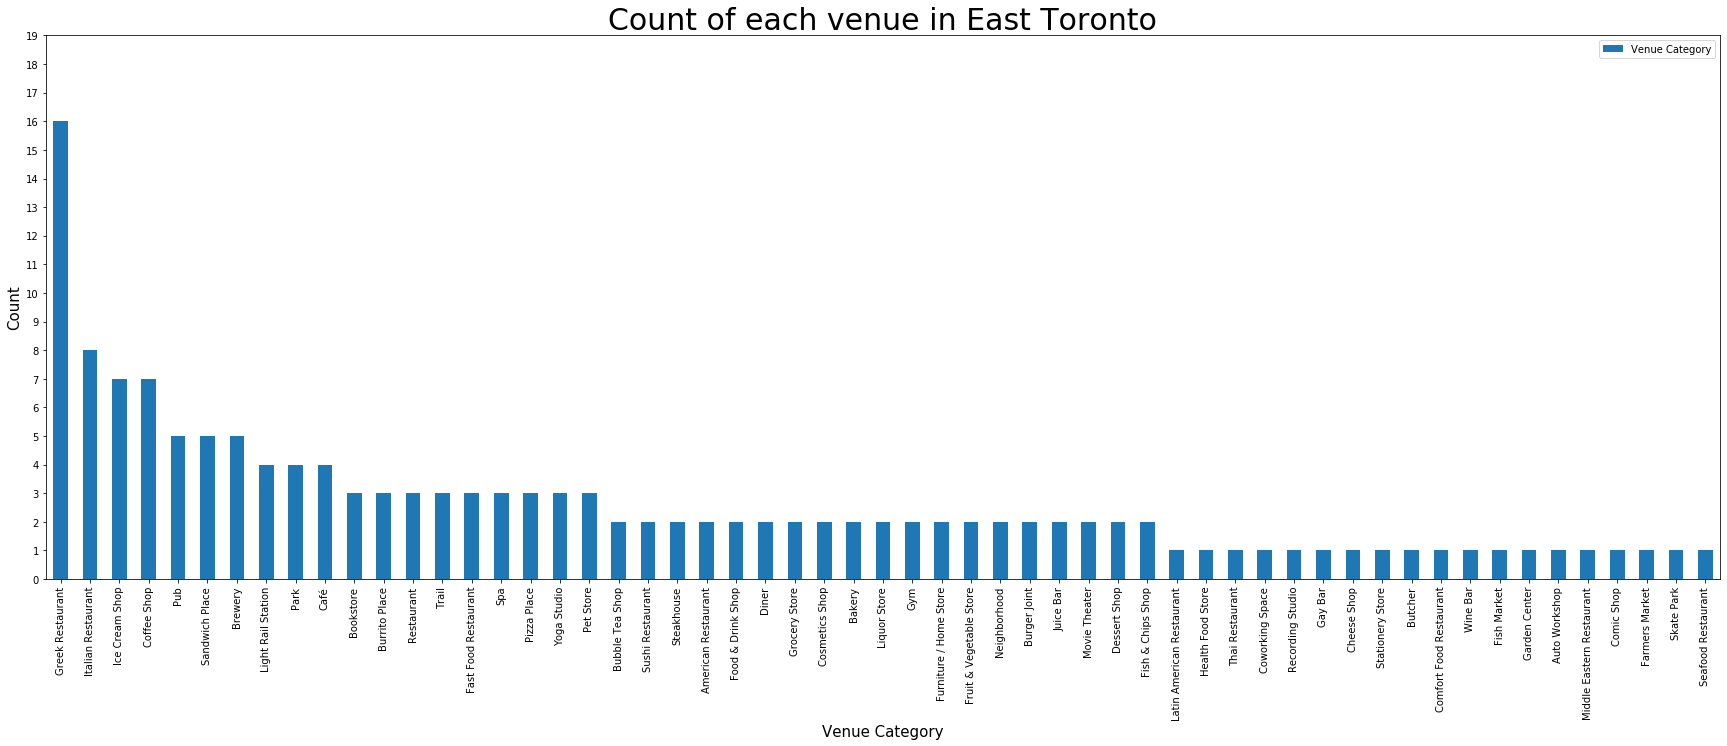

In [74]:

yint = range(0,20)
etoro_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in East Toronto',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

## Next up is Central Toronto

In [75]:
ctoro_data = df_final1[df_final1['Borough'] == 'Central Toronto'].reset_index(drop=True)
ctoro_data

,Borough,Neighborhood,Latitude,Longitude
0,Central Toronto,Lawrence Park,43.728020,-79.388790
1,Central Toronto,Davisville North,43.712751,-79.390197
2,Central Toronto,North Toronto West,43.715383,-79.405678
3,Central Toronto,Davisville,43.704324,-79.388790
4,Central Toronto,Moore Park,43.689574,-79.383160
5,Central Toronto,Summerhill East,43.689574,-79.383160
6,Central Toronto,Deer Park,43.686412,-79.400049
7,Central Toronto,Forest Hill SE,43.686412,-79.400049
8,Central Toronto,Rathnelly,43.686412,-79.400049
9,Central Toronto,South Hill,43.686412,-79.400049


In [77]:
ctoro_venues = getNearbyVenues(names=ctoro_data['Neighborhood'],
                                   latitudes=ctoro_data['Latitude'],
                                   longitudes=ctoro_data['Longitude']
                                  )

Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park
Summerhill East
Deer Park
Forest Hill SE
Rathnelly
South Hill
Summerhill West
Roselawn
Forest Hill North
Forest Hill West
The Annex
North Midtown
Yorkville


In [78]:
ctoro_venues.shape

(225, 7)

In [79]:
ctoro_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,Lake,43.727910,-79.386857,Lake
2,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
3,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
4,Davisville North,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop


In [80]:
ctoro_venues['Venue Category'].unique()

array(['Park', 'Lake', 'Swim School', 'Bus Line', 'Food & Drink Shop',
       'Breakfast Spot', 'Clothing Store', 'Hotel', 'Convenience Store',
       'Sandwich Place', 'Gym', 'Chinese Restaurant', 'Yoga Studio',
       'Spa', 'Diner', 'Salon / Barbershop', 'Coffee Shop', 'Restaurant',
       'Sporting Goods Shop', 'Mexican Restaurant', 'Dessert Shop',
       'Burger Joint', 'Café', 'Health & Beauty Service', 'Gift Shop',
       'Furniture / Home Store', 'Rental Car Location', 'Grocery Store',
       'Indian Restaurant', 'Pizza Place', 'Seafood Restaurant',
       'Sushi Restaurant', 'Italian Restaurant', 'Brewery',
       'Thai Restaurant', 'Toy / Game Store', 'Greek Restaurant',
       'Pharmacy', 'Farmers Market', 'Gourmet Shop', 'Tennis Court',
       'Playground', 'Liquor Store', 'Supermarket', 'American Restaurant',
       'Sports Bar', 'Pub', 'Fried Chicken Joint',
       'Vietnamese Restaurant', 'Light Rail Station', 'Bagel Shop',
       'Garden', 'Pool', 'Trail', 'Jewelry Stor

In [81]:
ctoro_venue_count=ctoro_venues['Venue Category'].value_counts().to_frame()
ctoro_venue_count

,Venue Category
Coffee Shop,20
Sandwich Place,13
Pub,13
Café,12
Park,11
Pizza Place,10
Sushi Restaurant,9
Liquor Store,8
American Restaurant,8
Restaurant,7


In [82]:
ctoro_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Coffee Shop,20
Sandwich Place,13
Pub,13
Café,12
Park,11
Pizza Place,10
Sushi Restaurant,9
Liquor Store,8
American Restaurant,8
Restaurant,7


Text(0, 0.5, 'Count')

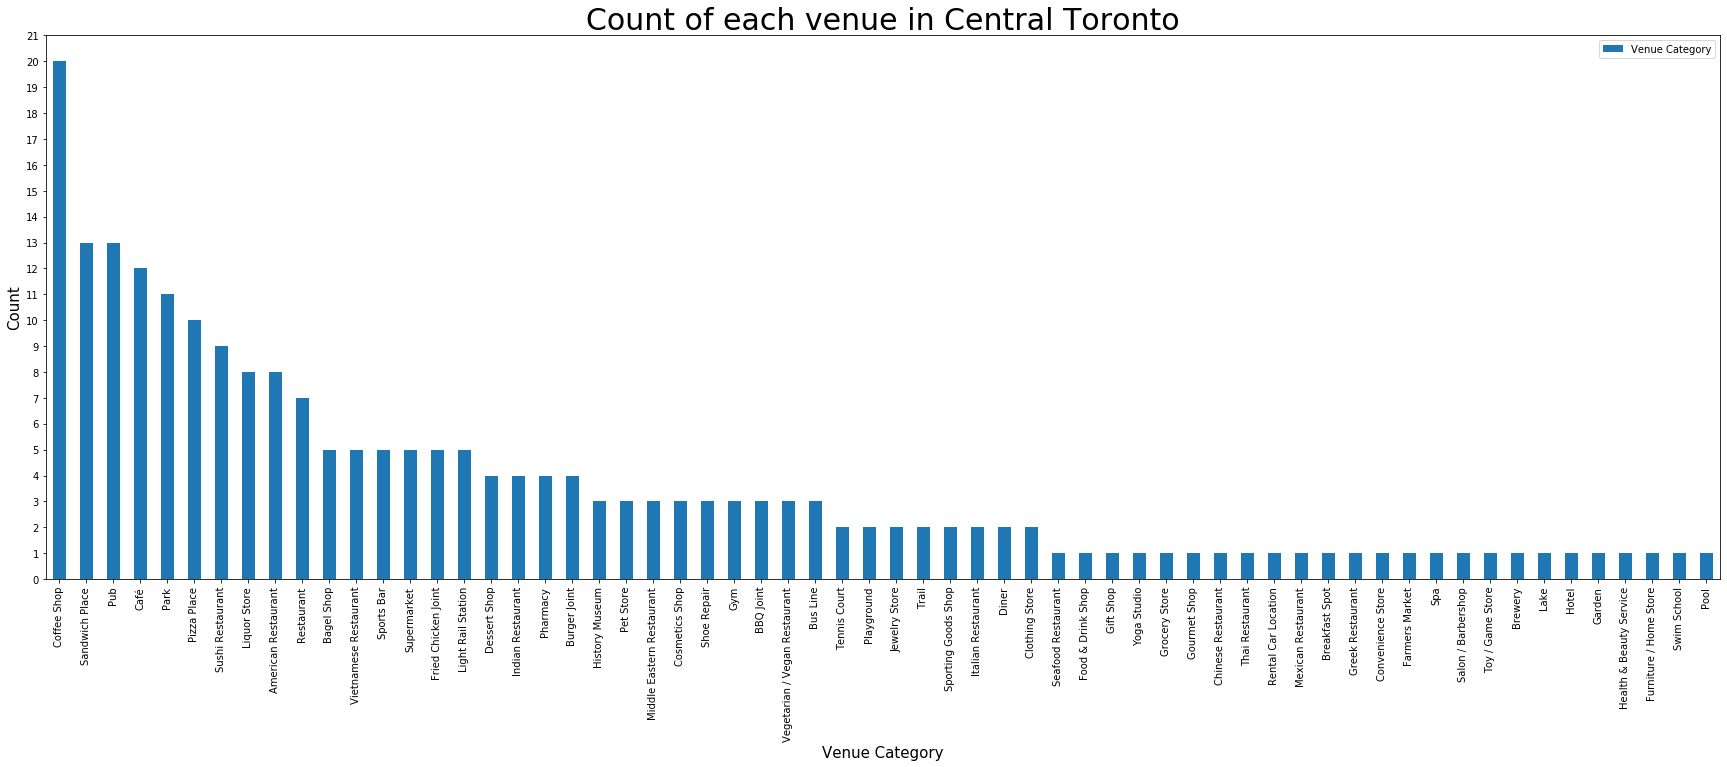

In [83]:
yint = range(0,22)
ctoro_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in Central Toronto',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

## Next up is Downtown Toronto

In [84]:
dtoro_data = df_final1[df_final1['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
dtoro_data

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,Rosedale,43.679563,-79.377529
1,Downtown Toronto,Cabbagetown,43.667967,-79.367675
2,Downtown Toronto,St. James Town,43.667967,-79.367675
3,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
4,Downtown Toronto,Harbourfront,43.654260,-79.360636
5,Downtown Toronto,Ryerson,43.657162,-79.378937
6,Downtown Toronto,Garden District,43.657162,-79.378937
7,Downtown Toronto,St. James Town,43.651494,-79.375418
8,Downtown Toronto,Berczy Park,43.644771,-79.373306
9,Downtown Toronto,Central Bay Street,43.657952,-79.387383


In [86]:
dtoro_venues = getNearbyVenues(names=dtoro_data['Neighborhood'],
                                   latitudes=dtoro_data['Latitude'],
                                   longitudes=dtoro_data['Longitude']
                                  )

Rosedale
Cabbagetown
St. James Town
Church and Wellesley
Harbourfront
Ryerson
Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide
King
Richmond
Harbourfront East
Toronto Islands
Union Station
Design Exchange
Toronto Dominion Centre
Commerce Court
Victoria Hotel
Harbord
University of Toronto
Chinatown
Grange Park
Kensington Market
CN Tower
Bathurst Quay
Island airport
Harbourfront West
King and Spadina
Railway Lands
South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place
Underground city
Christie
Queen's Park


In [87]:
dtoro_venues.shape

(936, 7)

In [88]:
dtoro_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
1,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
2,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
3,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail
4,Cabbagetown,43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner


In [89]:
dtoro_venues['Venue Category'].unique()

array(['Playground', 'Park', 'Trail', 'Diner', 'Japanese Restaurant',
       'Indian Restaurant', 'Restaurant', 'Italian Restaurant', 'Café',
       'Bakery', 'Jewelry Store', 'General Entertainment', 'Butcher',
       'Gastropub', 'Pub', 'Caribbean Restaurant', 'Pet Store',
       'Deli / Bodega', 'Taiwanese Restaurant', 'Gift Shop', 'Market',
       'Bank', 'Thai Restaurant', 'Coffee Shop', 'Beer Store',
       'Sandwich Place', 'Pizza Place', 'Theme Restaurant',
       'Dance Studio', 'Breakfast Spot', 'Bubble Tea Shop',
       'Mexican Restaurant', 'Salon / Barbershop', 'Ramen Restaurant',
       'Tea Room', 'Burger Joint', 'Bookstore', 'Ethiopian Restaurant',
       'Juice Bar', 'Gay Bar', 'Creperie', 'Hobby Shop',
       'Sushi Restaurant', "Men's Store", 'Steakhouse',
       'Gym / Fitness Center', 'Spa', 'Historic Site', 'Chocolate Shop',
       'Farmers Market', 'Dessert Shop', 'Performing Arts Venue',
       'French Restaurant', 'Event Space', 'Clothing Store', 'Comic Shop',


In [90]:
dtoro_venue_count=dtoro_venues['Venue Category'].value_counts().to_frame()
dtoro_venue_count

,Venue Category
Café,73
Coffee Shop,57
Restaurant,29
Japanese Restaurant,26
Bakery,25
Airport Service,21
Hotel,21
Steakhouse,20
Park,19
Bar,18


In [91]:
dtoro_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Café,73
Coffee Shop,57
Restaurant,29
Japanese Restaurant,26
Bakery,25
Airport Service,21
Hotel,21
Steakhouse,20
Park,19
Bar,18


Text(0, 0.5, 'Count')

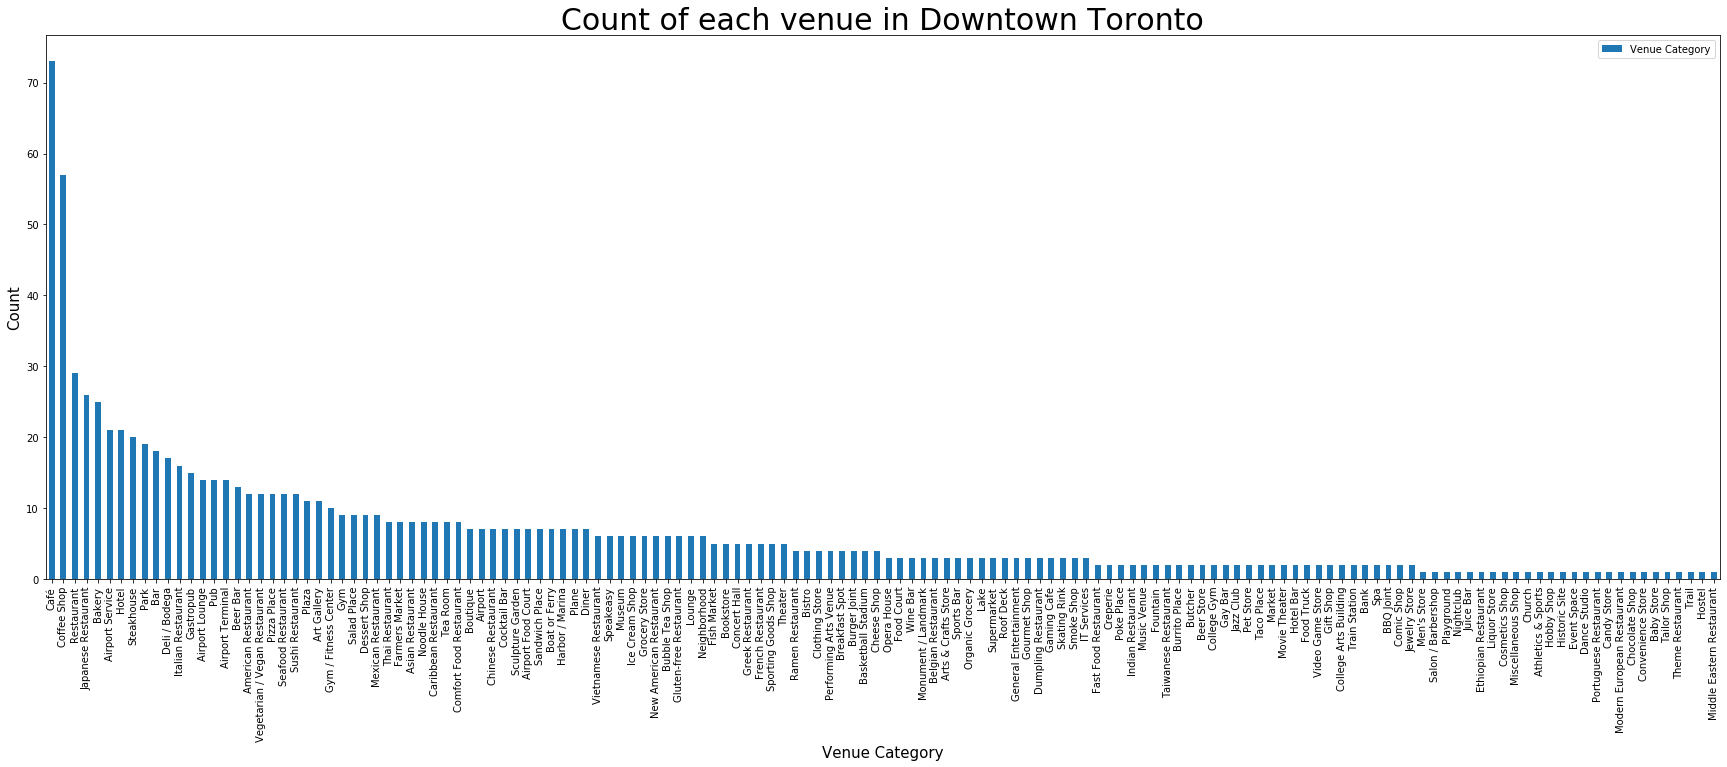

In [92]:
#yint = range(0,20)
dtoro_venue_count.plot(kind='bar', figsize=(30,10))
#plt.yticks(yint)
plt.title('Count of each venue in Downtown Toronto',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

### Since the above histogram is not readable, we will try splitting the data frame into two parts 

In [93]:
dtoro_venue_count1 = dtoro_venue_count.iloc[:103, :]
dtoro_venue_count2 = dtoro_venue_count.iloc[103:, :]

In [94]:
dtoro_venue_count1.shape
dtoro_venue_count1.tail()

,Venue Category
Butcher,2
Beer Store,2
College Gym,2
Gay Bar,2
Jazz Club,2


In [95]:
dtoro_venue_count2.head()

,Venue Category
Pet Store,2
Taco Place,2
Market,2
Movie Theater,2
Hotel Bar,2


Text(0, 0.5, 'Count')

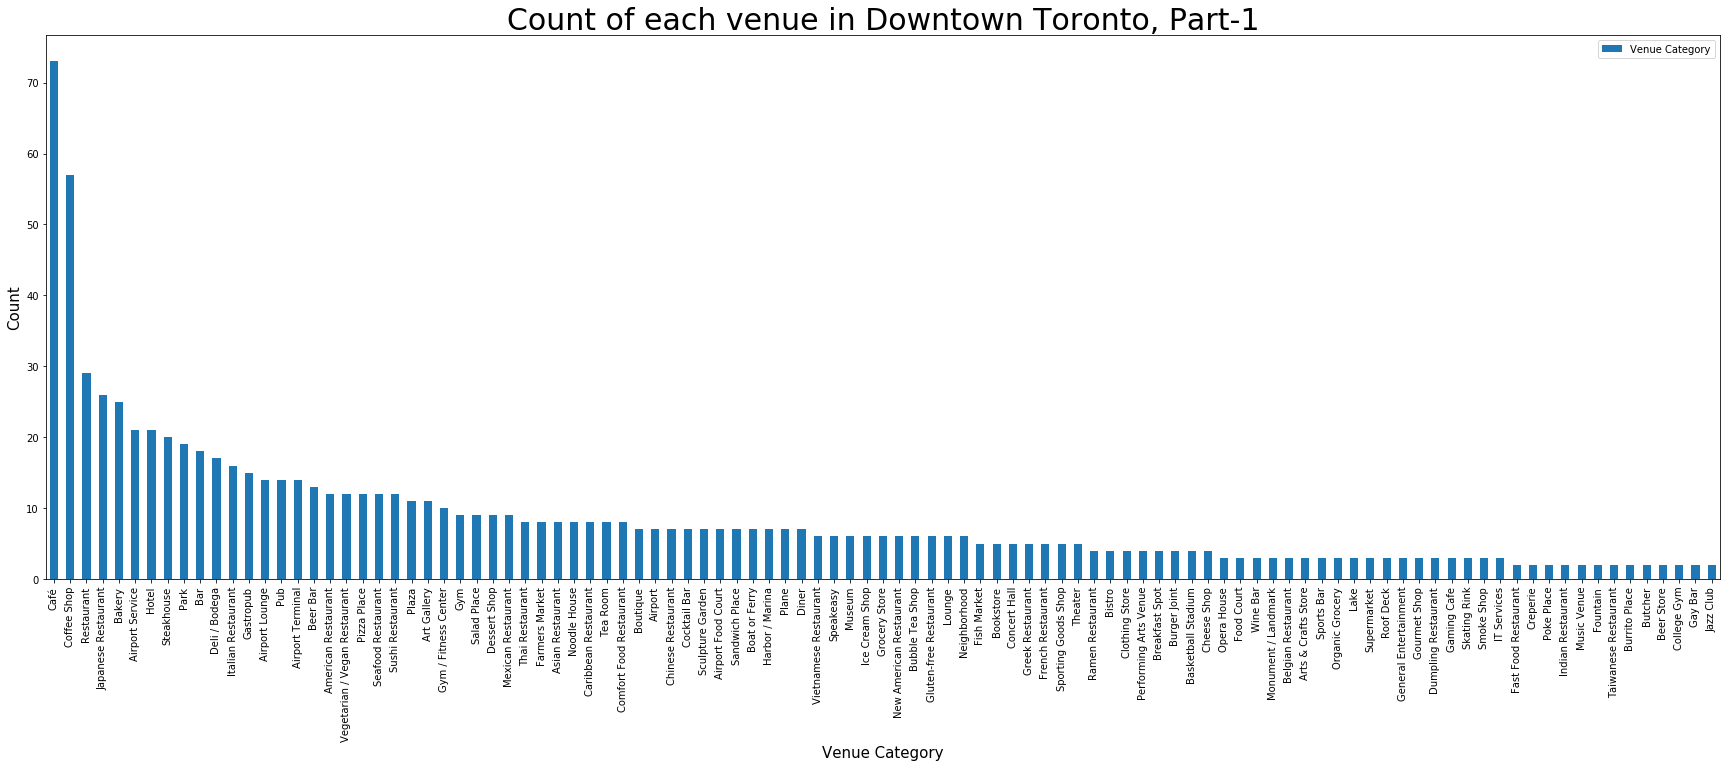

In [96]:
#yint = range(0,20)
dtoro_venue_count1.plot(kind='bar', figsize=(30,10))
#plt.yticks(yint)
plt.title('Count of each venue in Downtown Toronto, Part-1',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

Text(0, 0.5, 'Count')

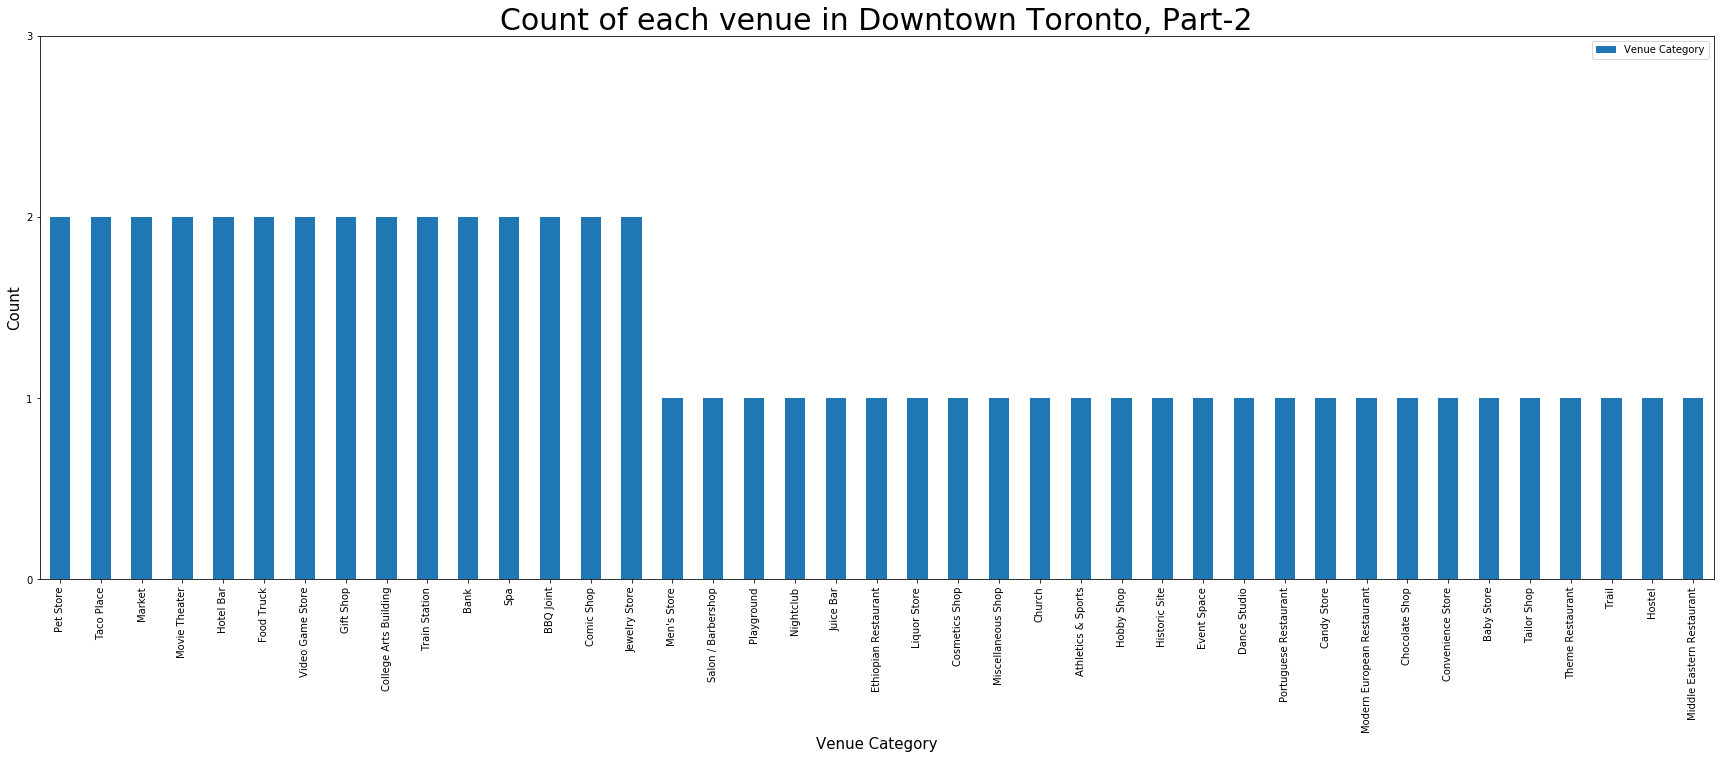

In [310]:
yint = range(0,4)
dtoro_venue_count2.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in Downtown Toronto, Part-2',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

## And lastly, Western Toronto

In [98]:
wtoro_data = df_final1[df_final1['Borough'] == 'West Toronto'].reset_index(drop=True)
wtoro_data

,Borough,Neighborhood,Latitude,Longitude
0,West Toronto,Dovercourt Village,43.669005,-79.442259
1,West Toronto,Dufferin,43.669005,-79.442259
2,West Toronto,Little Portugal,43.647927,-79.419750
3,West Toronto,Trinity,43.647927,-79.419750
4,West Toronto,Brockton,43.636847,-79.428191
5,West Toronto,Exhibition Place,43.636847,-79.428191
6,West Toronto,Parkdale Village,43.636847,-79.428191
7,West Toronto,High Park,43.661608,-79.464763
8,West Toronto,The Junction South,43.661608,-79.464763
9,West Toronto,Parkdale,43.648960,-79.456325


In [100]:
wtoro_venues = getNearbyVenues(names=wtoro_data['Neighborhood'],
                                   latitudes=wtoro_data['Latitude'],
                                   longitudes=wtoro_data['Longitude']
                                  )

Dovercourt Village
Dufferin
Little Portugal
Trinity
Brockton
Exhibition Place
Parkdale Village
High Park
The Junction South
Parkdale
Roncesvalles
Runnymede
Swansea


In [101]:
wtoro_venues.shape

(298, 7)

In [102]:
wtoro_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Dovercourt Village,43.669005,-79.442259,The Greater Good Bar,43.669409,-79.439267,Bar
1,Dovercourt Village,43.669005,-79.442259,Parallel,43.669516,-79.438728,Middle Eastern Restaurant
2,Dovercourt Village,43.669005,-79.442259,Happy Bakery & Pastries,43.667050,-79.441791,Bakery
3,Dovercourt Village,43.669005,-79.442259,Planet Fitness Toronto Galleria,43.667588,-79.442574,Gym / Fitness Center
4,Dovercourt Village,43.669005,-79.442259,Blood Brothers Brewing,43.669944,-79.436533,Brewery


In [103]:
wtoro_venues['Venue Category'].unique()

array(['Bar', 'Middle Eastern Restaurant', 'Bakery',
       'Gym / Fitness Center', 'Brewery', 'Supermarket', 'Music Venue',
       'Café', 'Bank', 'Pharmacy', 'Park', 'Wine Shop', 'Pizza Place',
       'Pool', 'Brazilian Restaurant', 'Korean Restaurant',
       'Ice Cream Shop', 'Greek Restaurant', 'Cuban Restaurant',
       'Wine Bar', 'Asian Restaurant', 'Cocktail Bar', 'Art Gallery',
       'New American Restaurant', 'Yoga Studio', 'Theater',
       'Vietnamese Restaurant', 'Record Shop', 'French Restaurant',
       'Beer Store', 'Vegetarian / Vegan Restaurant', 'Malay Restaurant',
       'Italian Restaurant', 'Boutique', 'Coffee Shop', 'Gym',
       'Breakfast Spot', 'Pet Store', 'Furniture / Home Store',
       'Climbing Gym', 'Restaurant', 'Stadium', 'Performing Arts Venue',
       'Burrito Place', 'Grocery Store', 'Intersection',
       'Convenience Store', 'Gastropub', 'Speakeasy', 'Flea Market',
       'Arts & Crafts Store', 'Thai Restaurant', 'Mexican Restaurant',
       'Bo

In [104]:
wtoro_venue_count=wtoro_venues['Venue Category'].value_counts().to_frame()
wtoro_venue_count

,Venue Category
Bar,21
Café,21
Italian Restaurant,13
Coffee Shop,12
Bakery,11
Pizza Place,10
Breakfast Spot,8
Restaurant,7
Asian Restaurant,6
Bookstore,6


In [105]:
wtoro_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Bar,21
Café,21
Italian Restaurant,13
Coffee Shop,12
Bakery,11
Pizza Place,10
Breakfast Spot,8
Restaurant,7
Asian Restaurant,6
Bookstore,6


Text(0, 0.5, 'Count')

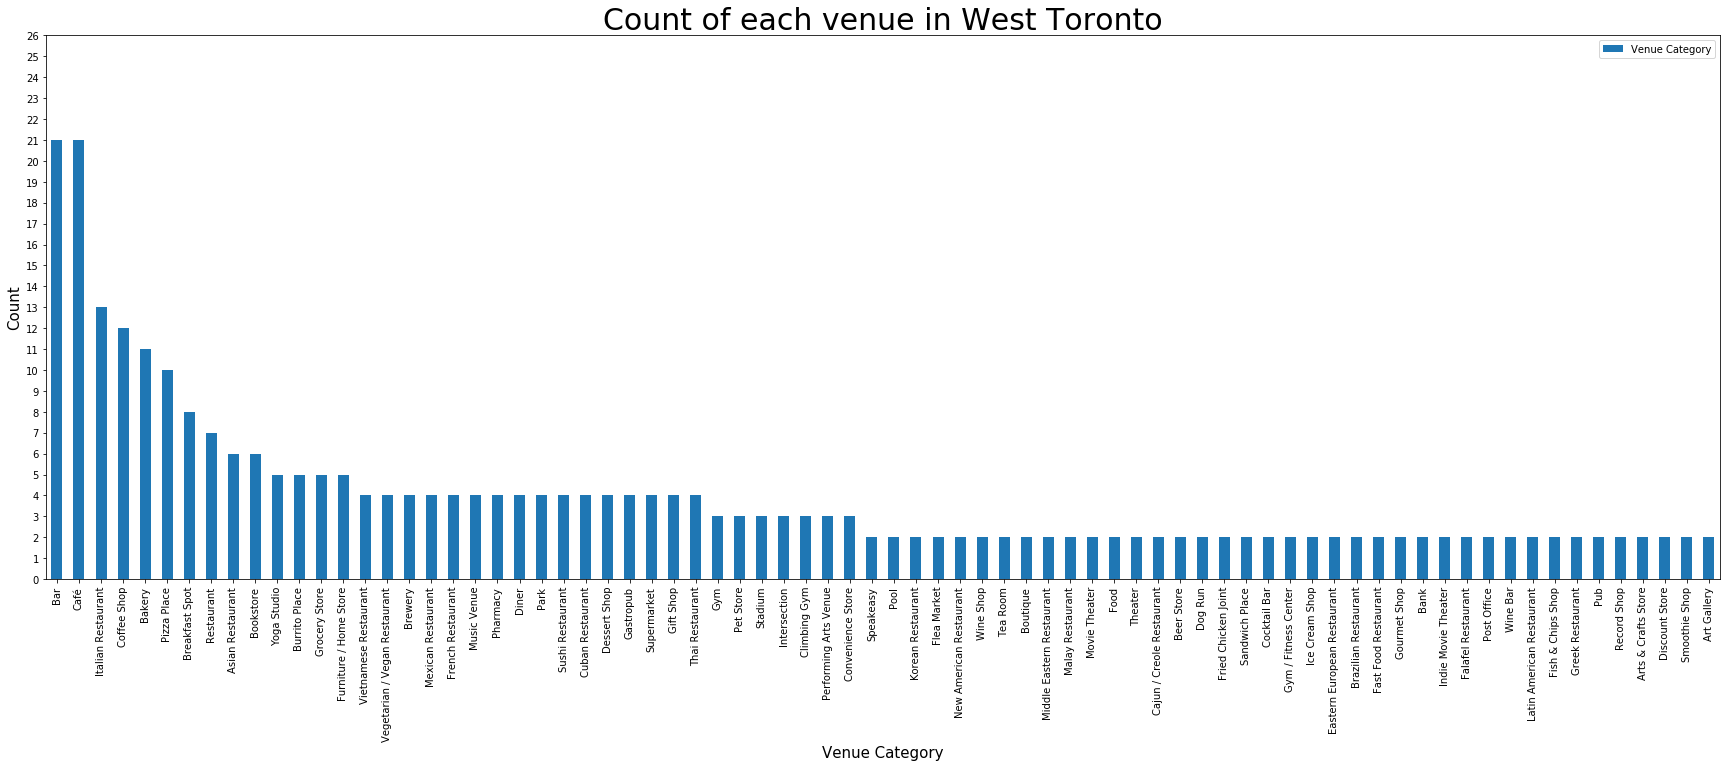

In [106]:
yint = range(0,27)
wtoro_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in West Toronto',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

### Now that all Boroughs associated with Toronto are completed, we will move on to the last three remaining Boroughs

## Starting with....Etobicoke

In [107]:
etobicoke_data = df_final1[df_final1['Borough'] == 'Etobicoke'].reset_index(drop=True)
etobicoke_data

,Borough,Neighborhood,Latitude,Longitude
0,Etobicoke,Humber Bay Shores,43.605647,-79.501321
1,Etobicoke,Mimico South,43.605647,-79.501321
2,Etobicoke,New Toronto,43.605647,-79.501321
3,Etobicoke,Alderwood,43.602414,-79.543484
4,Etobicoke,Long Branch,43.602414,-79.543484
5,Etobicoke,The Kingsway,43.653654,-79.506944
6,Etobicoke,Montgomery Road,43.653654,-79.506944
7,Etobicoke,Old Mill North,43.653654,-79.506944
8,Etobicoke,Humber Bay,43.636258,-79.498509
9,Etobicoke,King's Mill Park,43.636258,-79.498509


In [110]:
etobicoke_venues = getNearbyVenues(names=etobicoke_data['Neighborhood'],
                                   latitudes=etobicoke_data['Latitude'],
                                   longitudes=etobicoke_data['Longitude']
                                  )

Humber Bay Shores
Mimico South
New Toronto
Alderwood
Long Branch
The Kingsway
Montgomery Road
Old Mill North
Humber Bay
King's Mill Park
Kingsway Park South East
Mimico NE
Old Mill South
The Queensway East
Royal York South East
Sunnylea
Kingsway Park South West
Mimico NW
The Queensway West
Royal York South West
South of Bloor
Cloverdale
Islington
Martin Grove
Princess Gardens
West Deane Park
Bloordale Gardens
Eringate
Markland Wood
Old Burnhamthorpe
Westmount
Kingsview Village
Martin Grove Gardens
Richview Gardens
St. Phillips
Albion Gardens
Beaumond Heights
Humbergate
Jamestown
Mount Olive
Silverstone
South Steeles
Thistletown
Northwest


In [111]:
etobicoke_venues.shape

(290, 7)

In [112]:
etobicoke_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Humber Bay Shores,43.605647,-79.501321,LCBO,43.602281,-79.499302,Liquor Store
1,Humber Bay Shores,43.605647,-79.501321,Domino's Pizza,43.601676,-79.500908,Pizza Place
2,Humber Bay Shores,43.605647,-79.501321,New Toronto Fish & Chips,43.601849,-79.503281,Restaurant
3,Humber Bay Shores,43.605647,-79.501321,Delicia Bakery & Pastry,43.601403,-79.503012,Bakery
4,Humber Bay Shores,43.605647,-79.501321,Lucky Dice Restaurant,43.601392,-79.503056,Café


In [113]:
etobicoke_venues['Venue Category'].unique()

array(['Liquor Store', 'Pizza Place', 'Restaurant', 'Bakery', 'Café',
       'Fried Chicken Joint', 'Sandwich Place', 'Pharmacy',
       'Fast Food Restaurant', 'Seafood Restaurant', 'Pet Store', 'Gym',
       'Mexican Restaurant', 'Pub', 'Coffee Shop', 'Skating Rink',
       'Athletics & Sports', 'Pool', 'Park', 'River',
       'Construction & Landscaping', 'Baseball Field', 'Home Service',
       'Burger Joint', 'Wings Joint', 'Discount Store', 'Supplement Shop',
       'Convenience Store', 'Grocery Store', 'Hardware Store',
       'Social Club', 'Flower Shop', 'Tanning Salon', 'Burrito Place',
       'Beer Store', 'Shopping Plaza', 'Chinese Restaurant',
       'Middle Eastern Restaurant', 'Intersection', 'Bus Line',
       'Mobile Phone Shop', 'Rental Car Location', 'Drugstore'],
      dtype=object)

In [114]:
etobicoke_venue_count=etobicoke_venues['Venue Category'].value_counts().to_frame()
etobicoke_venue_count


,Venue Category
Pizza Place,32
Grocery Store,21
Sandwich Place,19
Pharmacy,17
Fast Food Restaurant,16
Beer Store,12
Fried Chicken Joint,11
Gym,10
Home Service,8
Bakery,8


In [115]:
etobicoke_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Pizza Place,32
Grocery Store,21
Sandwich Place,19
Pharmacy,17
Fast Food Restaurant,16
Beer Store,12
Fried Chicken Joint,11
Gym,10
Home Service,8
Bakery,8


Text(0, 0.5, 'Count')

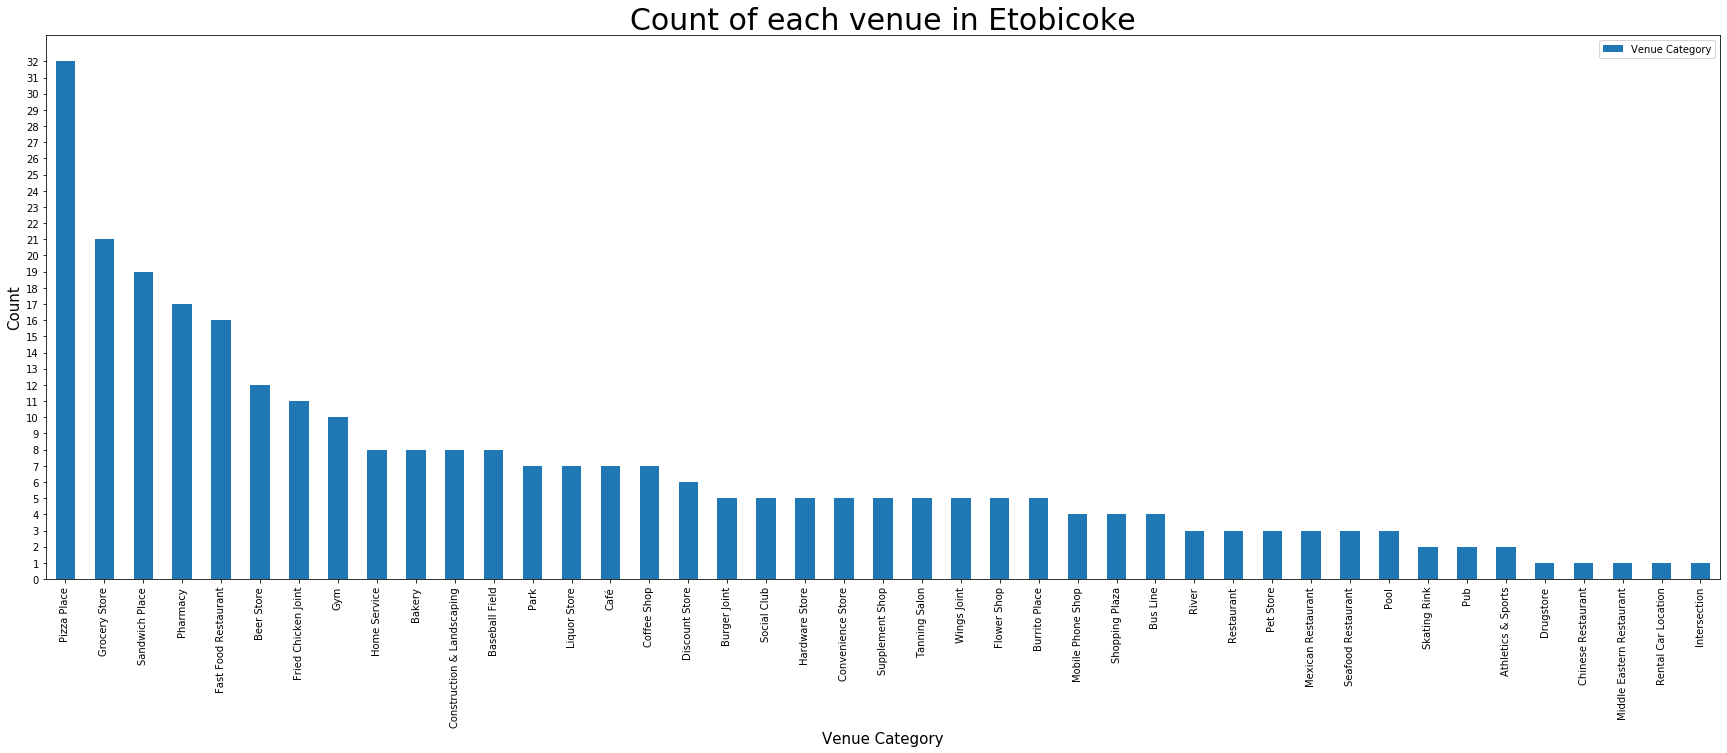

In [311]:
yint = range(0,33)
etobicoke_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in Etobicoke',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

In [118]:
mq_data = df_final1[df_final1['Borough'] == 'Mississauga'].reset_index(drop=True)
mq_data

,Borough,Neighborhood,Latitude,Longitude
0,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819


In [120]:
mq_venues = getNearbyVenues(names=mq_data['Neighborhood'],
                                   latitudes=mq_data['Latitude'],
                                   longitudes=mq_data['Longitude']
                                  )

Canada Post Gateway Processing Centre


In [121]:
mq_venues['Venue Category'].unique()

array(['Hotel', 'Burrito Place', 'Coffee Shop', 'Sandwich Place',
       'American Restaurant', 'Fried Chicken Joint',
       'Middle Eastern Restaurant', 'Mediterranean Restaurant', 'Gym'],
      dtype=object)

In [122]:
mq_venue_count=mq_venues['Venue Category'].value_counts().to_frame()
mq_venue_count

,Venue Category
Coffee Shop,2
Hotel,2
Middle Eastern Restaurant,1
Mediterranean Restaurant,1
Burrito Place,1
Fried Chicken Joint,1
American Restaurant,1
Sandwich Place,1
Gym,1


In [123]:
mq_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Coffee Shop,2
Hotel,2
Middle Eastern Restaurant,1
Mediterranean Restaurant,1
Burrito Place,1
Fried Chicken Joint,1
American Restaurant,1
Sandwich Place,1
Gym,1


Text(0, 0.5, 'Count')

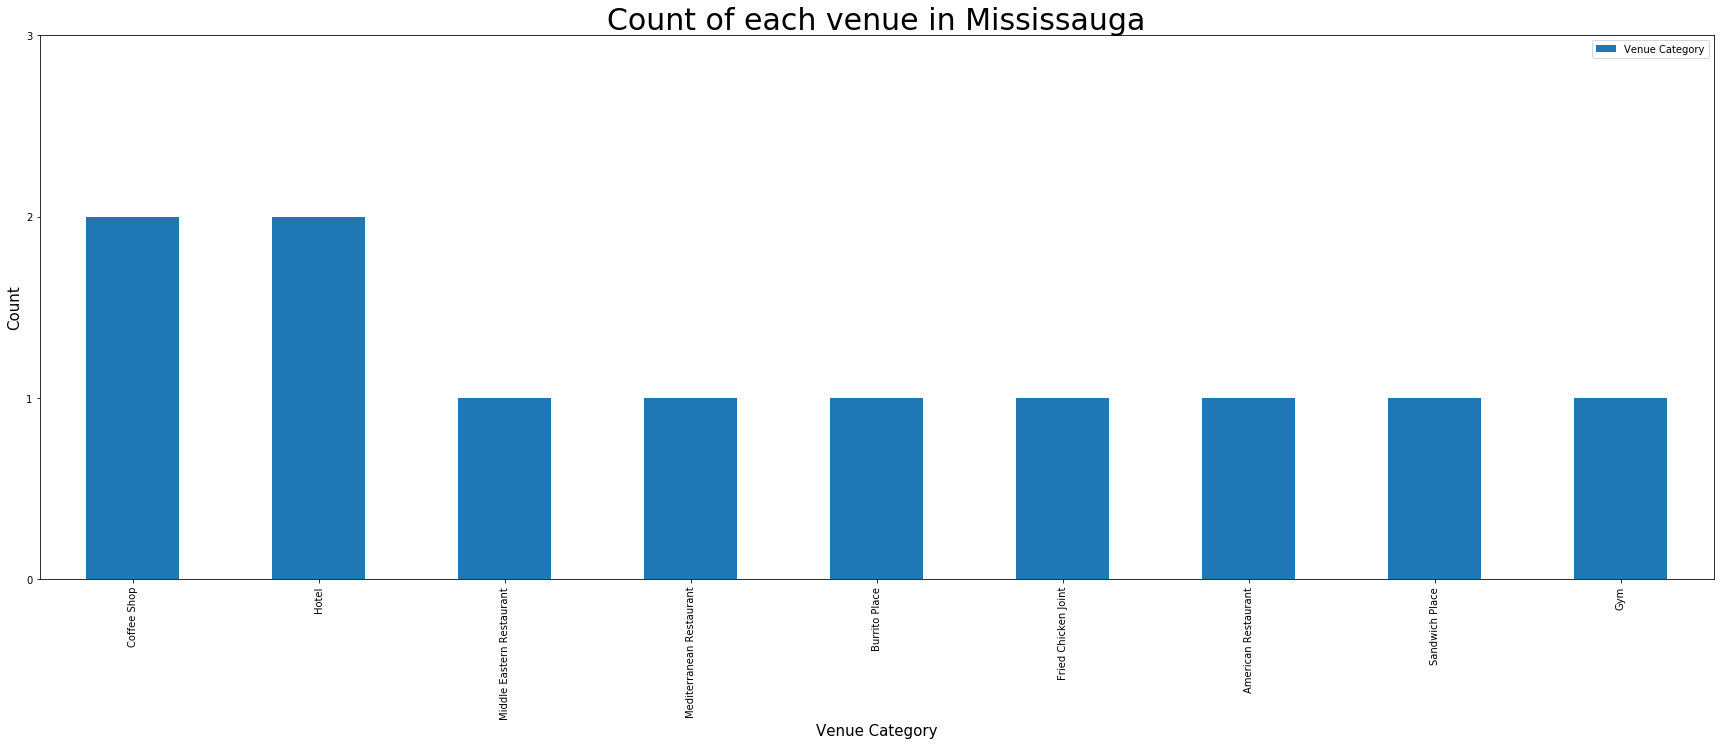

In [124]:
yint = range(0,4)
mq_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in Mississauga',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

# As we can see in the above graph, Mississauga does not have a lot of venues or choices for toursits to visit. Moreover, Queen's Park is a very small location to do meanigful analysis on.
# Hence in the final analysis table that I will display in my report, will not have the aforementioned Boroughs represented in it.

# Now that we have completed the exploration of all the Boroughs and Neighborhoods. We will shift our attention on the second aspect of this project which would include, finding an ideal location for a person to open an Indian restaurant in Toronto

In [20]:
def getNearbyVenuess(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
toro_venues = getNearbyVenuess(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Rouge
Malvern
Highland Creek
Rouge Hill
Port Union
Guildwood
Morningside
West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park
Ionview
Kennedy Park
Clairlea
Golden Mile
Oakridge
Cliffcrest
Cliffside
Scarborough Village West
Birch Cliff
Cliffside West
Dorset Park
Scarborough Town Centre
Wexford Heights
Maryvale
Wexford
Agincourt
Clarks Corners
Sullivan
Tam O'Shanter
Agincourt North
L'Amoreaux East
Milliken
Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview
Henry Farm
Oriole
Bayview Village
Silver Hills
York Mills
Newtonbrook
Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park
Don Mills South
Bathurst Manor
Downsview North
Wilson Heights
Northwood Park
York University
CFB Toronto
Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens
Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West
Riverdale
The Beaches West
Indi

In [26]:
toro_venues.shape

(6683, 7)

We get a total of 6883 venues when we searched the whole city of Toronto

In [27]:
t1=toro_venues['Neighborhood'].unique()

In [28]:
t1.size

207

In [30]:
df_comb=pd.merge(df, toro_venues, left_on='Neighborhood', right_on='Neighborhood', how='right')

In [31]:
df_comb.head()

,Borough,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Scarborough,Rouge,43.806686,-79.194353,43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa
1,Scarborough,Rouge,43.806686,-79.194353,43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
2,Scarborough,Rouge,43.806686,-79.194353,43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
3,Scarborough,Rouge,43.806686,-79.194353,43.806686,-79.194353,Tim Hortons,43.802000,-79.198169,Coffee Shop
4,Scarborough,Rouge,43.806686,-79.194353,43.806686,-79.194353,Lee Valley,43.803161,-79.199681,Hobby Shop


We will drop columns that are not required in our analysis as of now

In [32]:
df_comb.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'],inplace=True,axis=1)

In [33]:
df_comb1=df_comb['Neighborhood'].unique()

In [34]:
df_comb1.size

207

In [35]:
df_comb.rename(columns={'Venue Category':'Category'}, inplace=True)

In [36]:
df_comb.head()

,Borough,Neighborhood,Latitude,Longitude,Venue,Category
0,Scarborough,Rouge,43.806686,-79.194353,Images Salon & Spa,Spa
1,Scarborough,Rouge,43.806686,-79.194353,Wendy's,Fast Food Restaurant
2,Scarborough,Rouge,43.806686,-79.194353,Wendy's,Fast Food Restaurant
3,Scarborough,Rouge,43.806686,-79.194353,Tim Hortons,Coffee Shop
4,Scarborough,Rouge,43.806686,-79.194353,Lee Valley,Hobby Shop


We now extract all the Indian Restaurants from the combine table df_comb

In [37]:
df_ind_toro = df_comb[df_comb.Category == 'Indian Restaurant']

In [38]:
df_ind_toro = df_ind_toro.reset_index(drop=True)

In [40]:
df_ind_toro.head()

,Borough,Neighborhood,Latitude,Longitude,Venue,Category
0,Scarborough,Cedarbrae,43.773136,-79.239476,CANBE Foods Inc,Indian Restaurant
1,Scarborough,Cedarbrae,43.773136,-79.239476,La Sani Grill,Indian Restaurant
2,Scarborough,Dorset Park,43.757410,-79.273304,Kairali,Indian Restaurant
3,Scarborough,Dorset Park,43.757410,-79.273304,Karaikudi Chettinad South Indian Restaurant,Indian Restaurant
4,Scarborough,Scarborough Town Centre,43.757410,-79.273304,Kairali,Indian Restaurant


In [41]:
ind_rest_count=df_ind_toro['Borough'].value_counts().to_frame()

In [42]:
ind_rest_count

,Borough
East Toronto,11
Central Toronto,9
Scarborough,8
Downtown Toronto,7
West Toronto,5
East York,5
York,3
North York,2
Mississauga,1
Queen's Park,1


In [43]:
ind_rest_count.rename(columns={'Borough':'Count of Indian Restaurant'}, inplace=True)

In [44]:
ind_rest_count

,Count of Indian Restaurant
East Toronto,11
Central Toronto,9
Scarborough,8
Downtown Toronto,7
West Toronto,5
East York,5
York,3
North York,2
Mississauga,1
Queen's Park,1


We will now move onto some visualization

Text(0, 0.5, 'Count')

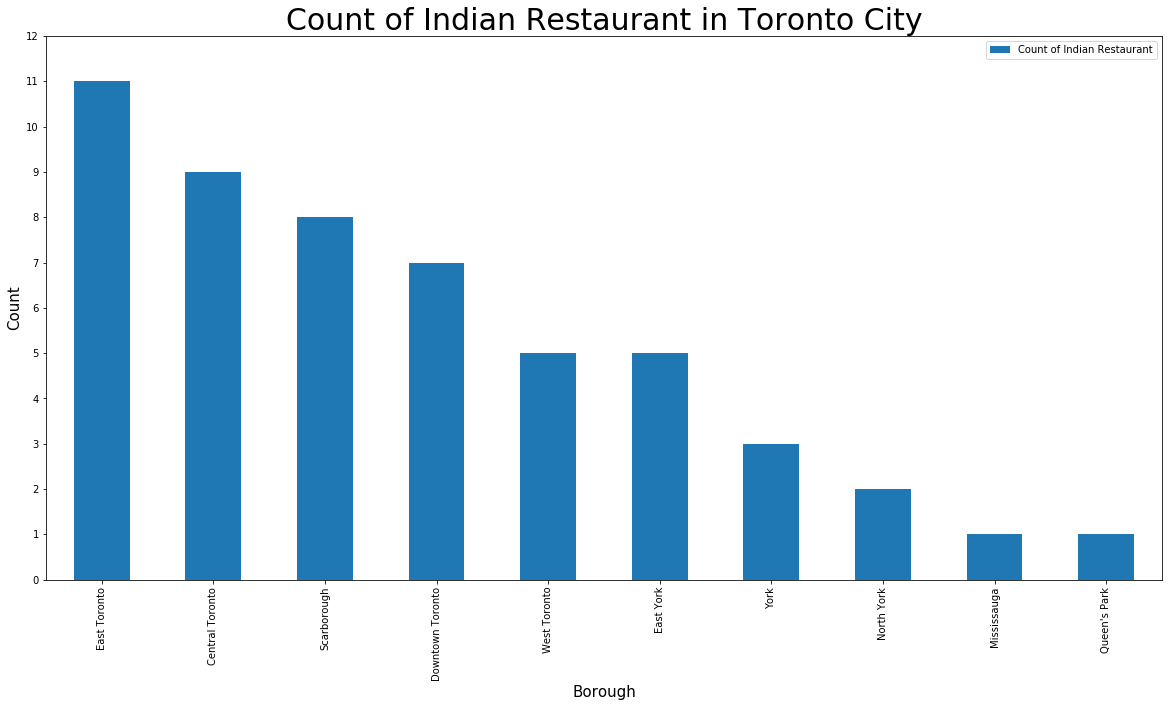

In [47]:
import matplotlib.pyplot as plt
yint = range(0,13)
ind_rest_count.plot(kind='bar', figsize=(20,10))
plt.yticks(yint)
plt.title('Count of Indian Restaurant in Toronto City',fontsize=30)
plt.xlabel('Borough', fontsize=15)
plt.ylabel('Count',fontsize=15)

Plotting the above acquired number of Indian Reataurants on a map

In [48]:
latitude=43.6352
longitude=-79.3832

Displaying a blank map of Toronto

In [49]:
toro_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [50]:
toro_map

In [51]:
toro_venues.drop(['Neighborhood Latitude','Neighborhood Longitude'],inplace=True,axis=1)

### Pre-processing of Data for displaying the map

In [52]:
toro_venues.head()

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rouge,Images Salon & Spa,43.802283,-79.198565,Spa
1,Rouge,Wendy's,43.807448,-79.199056,Fast Food Restaurant
2,Rouge,Wendy's,43.802008,-79.198080,Fast Food Restaurant
3,Rouge,Tim Hortons,43.802000,-79.198169,Coffee Shop
4,Rouge,Lee Valley,43.803161,-79.199681,Hobby Shop


In [53]:
toro_venues.rename(columns={'Venue Latitude':'Latitude','Venue Longitude':'Longitude'}, inplace=True)

In [54]:
toro_venues.rename(columns={'Venue Category':'Category'}, inplace=True)

In [55]:
toro_venues.head()

,Neighborhood,Venue,Latitude,Longitude,Category
0,Rouge,Images Salon & Spa,43.802283,-79.198565,Spa
1,Rouge,Wendy's,43.807448,-79.199056,Fast Food Restaurant
2,Rouge,Wendy's,43.802008,-79.198080,Fast Food Restaurant
3,Rouge,Tim Hortons,43.802000,-79.198169,Coffee Shop
4,Rouge,Lee Valley,43.803161,-79.199681,Hobby Shop


In [56]:
toro_venues_count = toro_venues[toro_venues.Category == 'Indian Restaurant']

In [57]:
toro_venues_count = toro_venues_count[toro_venues_count.Neighborhood != 'Not assigned']

In [58]:
toro_venues_count.reset_index(drop=True)

,Neighborhood,Venue,Latitude,Longitude,Category
0,Cedarbrae,CANBE Foods Inc,43.773546,-79.246082,Indian Restaurant
1,Cedarbrae,La Sani Grill,43.776214,-79.234848,Indian Restaurant
2,Dorset Park,Kairali,43.754915,-79.276945,Indian Restaurant
3,Dorset Park,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276,Indian Restaurant
4,Scarborough Town Centre,Kairali,43.754915,-79.276945,Indian Restaurant
5,Scarborough Town Centre,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276,Indian Restaurant
6,Wexford Heights,Kairali,43.754915,-79.276945,Indian Restaurant
7,Wexford Heights,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276,Indian Restaurant
8,The Beaches,Delhi Bistro,43.672506,-79.288353,Indian Restaurant
9,Leaside,Mt Everest Restaurant,43.713266,-79.366520,Indian Restaurant


In [59]:
toro_venues_count.dtypes

Neighborhood     object
Venue            object
Latitude        float64
Longitude       float64
Category         object
dtype: object

In [60]:
toro_venues_count.reset_index(drop=True)

,Neighborhood,Venue,Latitude,Longitude,Category
0,Cedarbrae,CANBE Foods Inc,43.773546,-79.246082,Indian Restaurant
1,Cedarbrae,La Sani Grill,43.776214,-79.234848,Indian Restaurant
2,Dorset Park,Kairali,43.754915,-79.276945,Indian Restaurant
3,Dorset Park,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276,Indian Restaurant
4,Scarborough Town Centre,Kairali,43.754915,-79.276945,Indian Restaurant
5,Scarborough Town Centre,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276,Indian Restaurant
6,Wexford Heights,Kairali,43.754915,-79.276945,Indian Restaurant
7,Wexford Heights,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276,Indian Restaurant
8,The Beaches,Delhi Bistro,43.672506,-79.288353,Indian Restaurant
9,Leaside,Mt Everest Restaurant,43.713266,-79.366520,Indian Restaurant


### Aggregating the total number Indian Restaurants per Neighborhood

In [61]:
toro_venues_count3=toro_venues_count['Neighborhood'].value_counts().to_frame().reset_index()

In [66]:
toro_venues_count3.rename(columns={'Neigh':'Neighborhood'}, inplace=True)

In [67]:
toro_venues_count3.head()

,Neighborhood,Count
0,India Bazaar,4
1,Thorncliffe Park,4
2,The Beaches West,4
3,Runnymede,2
4,Cedarbrae,2


In [71]:
df1=df.drop(['Borough'],axis=1)

In [72]:
df1.head()

,Neighborhood,Latitude,Longitude
0,Rouge,43.806686,-79.194353
1,Malvern,43.806686,-79.194353
2,Highland Creek,43.784535,-79.160497
3,Rouge Hill,43.784535,-79.160497
4,Port Union,43.784535,-79.160497


In [73]:
toro_venues_count6=pd.merge(toro_venues_count3, df1, on='Neighborhood',how='left')

In [74]:
toro_venues_count6.dtypes

Neighborhood     object
Count             int64
Latitude        float64
Longitude       float64
dtype: object

Converting _Count_ column into string type for ease of maping

In [75]:
toro_venues_count6['Count']=toro_venues_count6['Count'].astype('str')

In [510]:
temp=df.drop(['Borough'],axis=1)

Displaying a map, with each label when clicked, displays the number of Indian Restaurants in that neighborhood

In [81]:
toro_map = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, label in zip(toro_venues_count6.Latitude, toro_venues_count6.Longitude,toro_venues_count6.Count):
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, 
            color='red',
            fill=True,
            popup=label,
            fill_color='blue'            
        ).add_to(toro_map)
    
toro_map


# Results and Analysis

The results table has a list of boroughs in the column section. Next to each borough are columns that spcify the occurance of a venue based on high, moderate and low occurence. This count was procured from a Borough-wise analysis that was done earlier in this section.

https://github.com/shaunak09vb/Data-Science-Capstone/blob/master/results.PNG

# Conclusion

During the course of this capstone project, I was able to apply different data science techniques and tools that I learned in the IBM Data Science course. This helped me unearth meaningful insights from the data analysis that I did on the Toronto data set. The aspects I uncovered during the phase of data analysis are listed below.<br>
<pre>
•	Borough analysis
    o	Coffee shops are a venue that has a very high rate of occurrence in almost all the boroughs.
    o	Mississauga and Queen’s Park have very few venues to go to or choose from if you are a tourist.
    o	Parks are the next venue that have the most occurrences amongst the different boroughs.
    o	Downtown Toronto have the maximum and the most varied choices of venues to choose from for a tourist.
    
•	Toronto city analysis (for a new Indian restaurant)
    o	East Toronto and Central Toronto are the two boroughs with the maximum number of Indian Restaurants.
    o	India Bazaar, Thorncliffe Park and The Beaches West are the neighborhoods with the maximum number of 
         Indian restaurants.
    o	North York, Queen’s Park and Mississauga are locations ideal for opening a new Indian restaurant based on our 
         ideology that the new business will face minimum competition there.</pre>
